In [30]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM , Dense , GRU, Dropout
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
import os
directories = [
    "/Users/evangelosgeraridis/Desktop/MEAZON/September 2022",
    "/Users/evangelosgeraridis/Desktop/MEAZON/October 2022"
]

dataframes = {}

for directory in directories:
    files = os.listdir(directory)
    for file in files:
        if file.endswith(".csv"):
            file_path = os.path.join(directory, file)
            df = pd.read_csv(file_path)
            dataframes[file] = df
            


fridge_data = pd.concat([dataframes['fridgeS.csv'], dataframes['fridgeO.csv']], ignore_index=True)
aggregated_data = pd.concat([dataframes['AggregatedS.csv'], dataframes['AggregatedO.csv']], ignore_index=True)
dishwasher_data = pd.concat([dataframes['dishwasherS.csv'], dataframes['dishwasherO.csv']], ignore_index=True)
hotplate_data = pd.concat([dataframes['hotplateS.csv'], dataframes['hotplateO.csv']], ignore_index=True)
microwave_data = pd.concat([dataframes['microwaveS.csv'], dataframes['microwaveO.csv']], ignore_index=True)
washing_machine_data = pd.concat([dataframes['washing_machineS.csv'], dataframes['washing_machineO.csv']], ignore_index=True)
water_heater_data = pd.concat([dataframes['water_heaterS.csv'], dataframes['water_heaterO.csv']], ignore_index=True)

data_list = [fridge_data, dishwasher_data, hotplate_data, microwave_data, washing_machine_data, water_heater_data]

for i in range(len(data_list)):
    data_list[i] = aggregated_data.merge(data_list[i], on='ts')
    data_list[i] = data_list[i].set_index('ts')
    data_list[i] = data_list[i].dropna()

fridge_data = pd.DataFrame(data_list[0].rename(columns={'pwrA_x': 'aggregated_active_power', 'apwrA_x': 'aggregated_apparent_power','curA_x': 'aggregated_current','vltA_x': 'aggregated_voltage', 'screA_x': 'aggregated_crest_factor', 'pwrA_y': 'fridge_active_power', 'apwrA_y': 'fridge_apparent_power', 'curA_y': 'fridge_current', 'vltA_y': 'fridge_voltage', 'screA_y': 'fridge_crest_factor'}))
dishwasher_data = pd.DataFrame(data_list[1].rename(columns={'pwrA_x': 'aggregated_active_power', 'apwrA_x': 'aggregated_apparent_power','curA_x': 'aggregated_current','vltA_x': 'aggregated_voltage', 'screA_x': 'aggregated_crest_factor', 'pwrA_y': 'dishwasher_active_power', 'apwrA_y': 'dishwasher_apparent_power', 'curA_y': 'dishwasher_current', 'vltA_y': 'dishwasher_voltage', 'screA_y': 'dishwasher_crest_factor'}))
hotplate_data = pd.DataFrame(data_list[2].rename(columns={'pwrA_x': 'aggregated_active_power', 'apwrA_x': 'aggregated_apparent_power','curA_x': 'aggregated_current','vltA_x': 'aggregated_voltage', 'screA_x': 'aggregated_crest_factor', 'pwrA_y': 'hotplate_active_power', 'apwrA_y': 'hotplate_apparent_power', 'curA_y': 'hotplate_current', 'vltA_y': 'hotplate_voltage', 'screA_y': 'hotplate_crest_factor'}))
microwave_data = pd.DataFrame(data_list[3].rename(columns={'pwrA_x': 'aggregated_active_power', 'apwrA_x': 'aggregated_apparent_power','curA_x': 'aggregated_current','vltA_x': 'aggregated_voltage', 'screA_x': 'aggregated_crest_factor', 'pwrA_y': 'microwave_active_power', 'apwrA_y': 'microwave_apparent_power', 'curA_y': 'microwave_current', 'vltA_y': 'microwave_voltage', 'screA_y': 'microwave_crest_factor'}))
washing_machine_data = pd.DataFrame(data_list[4].rename(columns={'pwrA_x': 'aggregated_active_power', 'apwrA_x': 'aggregated_apparent_power','curA_x': 'aggregated_current','vltA_x': 'aggregated_voltage', 'screA_x': 'aggregated_crest_factor', 'pwrA_y': 'washing_machine_active_power', 'apwrA_y': 'washing_machine_apparent_power', 'curA_y': 'washing_machine_current', 'vltA_y': 'washing_machine_voltage', 'screA_y': 'washing_machine_crest_factor'}))
water_heater_data = pd.DataFrame(data_list[5].rename(columns={'pwrA': 'aggregated_active_power', 'apwrA': 'aggregated_apparent_power','curA': 'aggregated_current','vltA': 'aggregated_voltage', 'screA': 'aggregated_crest_factor', 'pwrC': 'water_heater_active_power', 'apwrC': 'water_heater_apparent_power', 'curC': 'water_heater_current', 'vltC': 'water_heater_voltage', 'screC': 'water_heater_crest_factor'}))


modified_dataframes = [fridge_data, dishwasher_data, hotplate_data, microwave_data, washing_machine_data, water_heater_data]

for df in modified_dataframes:
    print(df)
    print(df.info())


               aggregated_active_power  aggregated_apparent_power   
ts                                                                  
1662048942628                   33.136                     66.092  \
1662059291370                   34.121                     66.943   
1662059293620                   33.852                     67.077   
1662059293670                   33.807                     67.122   
1662059293720                   33.763                     67.077   
...                                ...                        ...   
1665728021166                   34.121                     65.420   
1665728021216                   34.076                     65.555   
1665728021266                   33.897                     65.644   
1665728021316                   33.673                     65.555   
1665766352306                  140.602                    155.514   

               aggregated_current  aggregated_voltage   
ts                                           

In [28]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score


class CO:
    def __init__(self, num_states=2, num_cluster=2):
        self.num_states = num_states
        self.num_cluster = num_cluster
        self.models = None

    def train(self, X):
        X_agg = self.create_input(X)
        self.models = self.train_co(X_agg)
        return self.models

    def create_input(self, X):
        n_samples, n_features = X.shape
        X_agg = np.zeros((n_samples, self.num_states))
        for i in range(n_samples):
            for j in range(self.num_states):
                X_agg[i, j] = np.sum(X[i, j * (n_features // self.num_states):(j + 1) * (n_features // self.num_states)])
        return X_agg

    def train_co(self, X):
        num_samples, num_features = X.shape
        models = []
        for k in range(num_features):
            model = KMeans(n_clusters=self.num_cluster).fit(X[:, k].reshape(-1, 1))
            models.append(model)
        return models

    def disaggregate(self, X):
        n_samples, n_features = X.shape
        X_agg = self.create_input(X)
        Y = np.zeros((n_samples, n_features))
        for k in range(n_features):
            cluster_labels = self.models[k].predict(X_agg[:, k].reshape(-1, 1))
            cluster_centers = self.models[k].cluster_centers_
            for i, label in enumerate(cluster_labels):
                Y[i, k] = cluster_centers[label]
        return Y

    def calculate_rmse(self, X_true, X_pred):
        return np.sqrt(mean_squared_error(X_true, X_pred))

    def calculate_mae(self, X_true, X_pred):
        return mean_absolute_error(X_true, X_pred)

    def calculate_rmae(self, X_true, X_pred):
        rmse = self.calculate_rmse(X_true, X_pred)
        return rmse / np.mean(X_true)

    def calculate_mse(self, X_true, X_pred):
        return mean_squared_error(X_true, X_pred)

    
aggregated_features = ['aggregated_active_power', 'aggregated_apparent_power', 'aggregated_current', 'aggregated_voltage', 'aggregated_crest_factor']
fridge_features = ['fridge_active_power', 'fridge_apparent_power','fridge_current', 'fridge_voltage', 'fridge_crest_factor']
washing_machine_features = ['washing_machine_active_power', 'washing_machine_apparent_power', 'washing_machine_current','washing_machine_voltage','washing_machine_crest_factor']
microwave_features = ['microwave_active_power', 'microwave_apparent_power', 'microwave_current','microwave_voltage','microwave_crest_factor']
dishwasher_features = ['dishwasher_active_power','dishwasher_apparent_power','dishwasher_current','dishwasher_voltage','dishwasher_crest_factor']
hotplate_features = ['hotplate_active_power','hotplate_apparent_power','hotplate_current','hotplate_voltage','hotplate_crest_factor']
water_heater_features = ['water_heater_active_power','water_heater_apparent_power','water_heater_current','water_heater_voltage','water_heater_crest_factor']

X_fridge = fridge_data[aggregated_features].values
Y_fridge = fridge_data[fridge_features].values

X_train_fridge, X_test_fridge, Y_train_fridge, Y_test_fridge = train_test_split(X_fridge, Y_fridge, test_size=0.2, random_state=42)

co_disaggregator_fridge = CO(num_states=5, num_cluster=5)
co_disaggregator_fridge.train(X_train_fridge)

disaggregated_data_fridge = co_disaggregator_fridge.disaggregate(X_test_fridge)

for i, feature in enumerate(fridge_features):
    true_values = Y_test_fridge[:, i]
    pred_values = disaggregated_data_fridge[:, i]
    
    rmse = co_disaggregator_fridge.calculate_rmse(true_values, pred_values)
    mse = co_disaggregator_fridge.calculate_mse(true_values, pred_values)
    rmae = co_disaggregator_fridge.calculate_rmae(true_values, pred_values)
    mae = co_disaggregator_fridge.calculate_mae(true_values, pred_values)
    r2 = r2_score(true_values, pred_values)
    
    print(f"Metrics for {feature}:")
    print("RMSE:", rmse)
    print("MSE:", mse)
    print("RMAE:", rmae)
    print("MAE:", mae)
    print("R2:", r2)
    print()


Metrics for fridge_active_power:
RMSE: 694.1568432814709
MSE: 481853.72307449643
RMAE: 3.0041234707060025
MAE: 303.67778275125704
R2: -2.900410770269708

Metrics for fridge_apparent_power:
RMSE: 701.1810875194799
MSE: 491654.9174950005
RMAE: 2.654275024044485
MAE: 320.0676991460296
R2: -2.2924413552021217

Metrics for fridge_current:
RMSE: 3.228549433178012
MSE: 10.423531442474061
RMAE: 2.6975713195984254
MAE: 1.4636486542517957
R2: -2.3828735789686917

Metrics for fridge_voltage:
RMSE: 0.6885511284334491
MSE: 0.47410265646697614
RMAE: 0.003101779755503439
MAE: 0.5413784010870165
R2: 0.8885370393043188

Metrics for fridge_crest_factor:
RMSE: 0.9330122486125655
MSE: 0.8705118560610756
RMAE: 1.262908051931492
MAE: 0.8827873039772194
R2: -47.35869701102134



/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

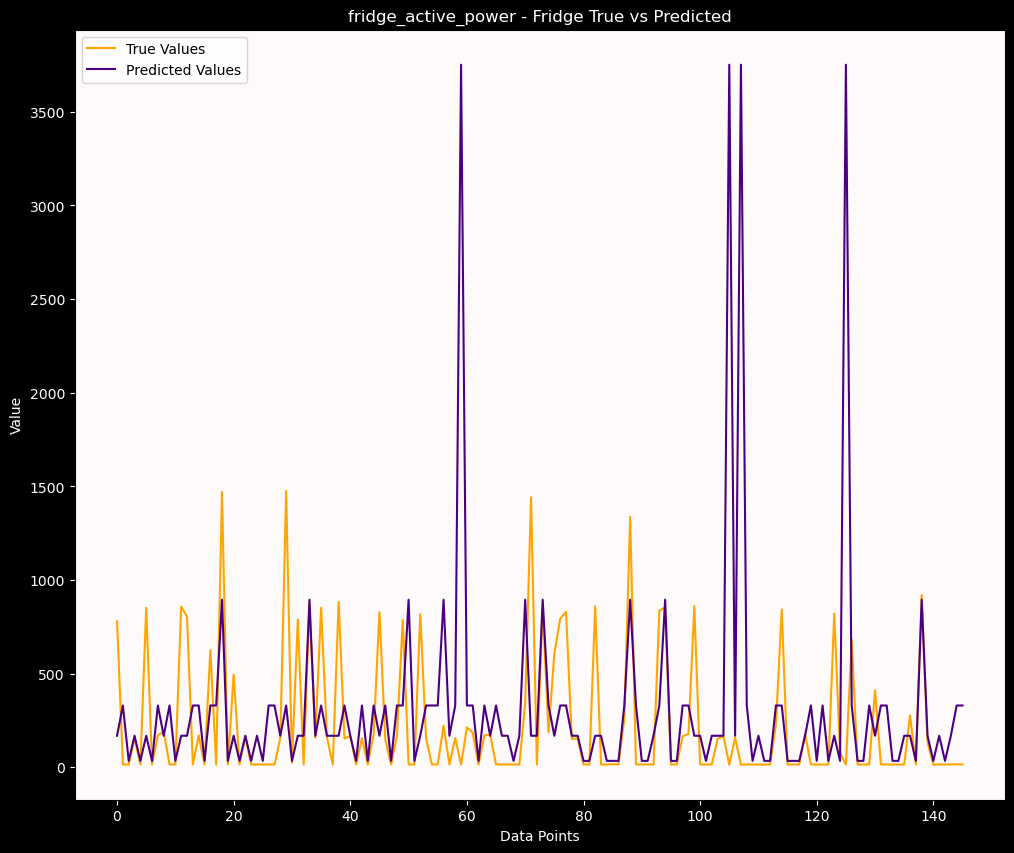

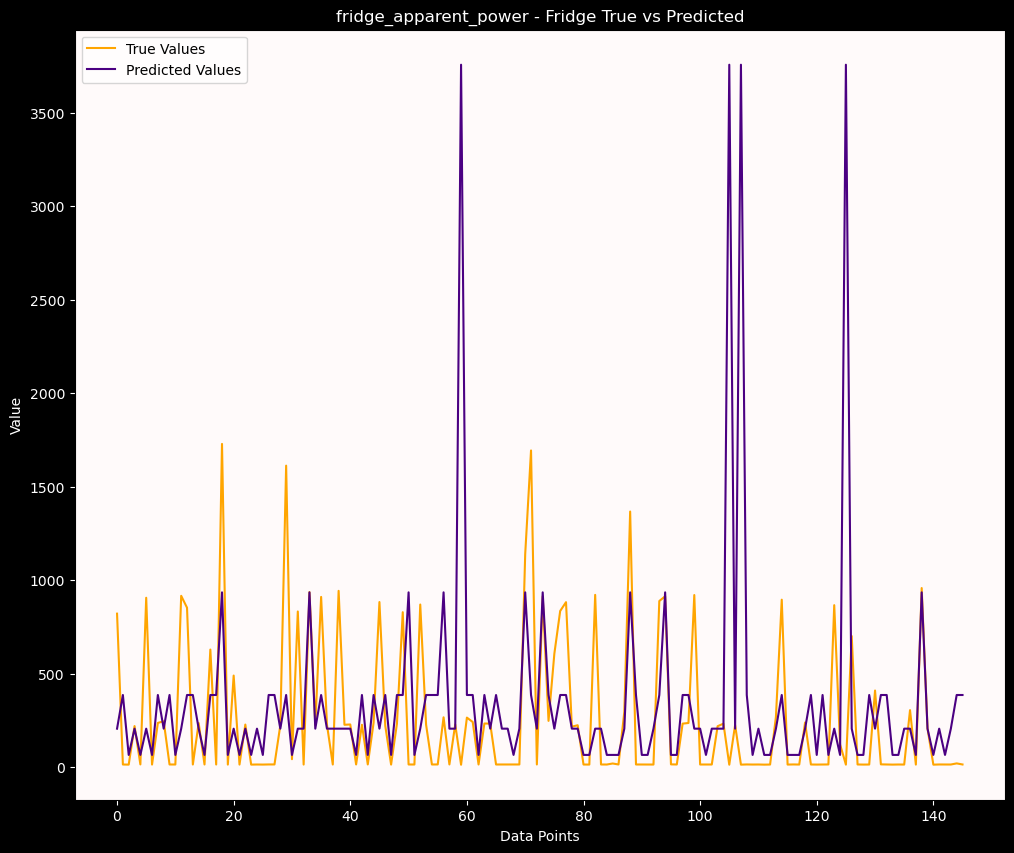

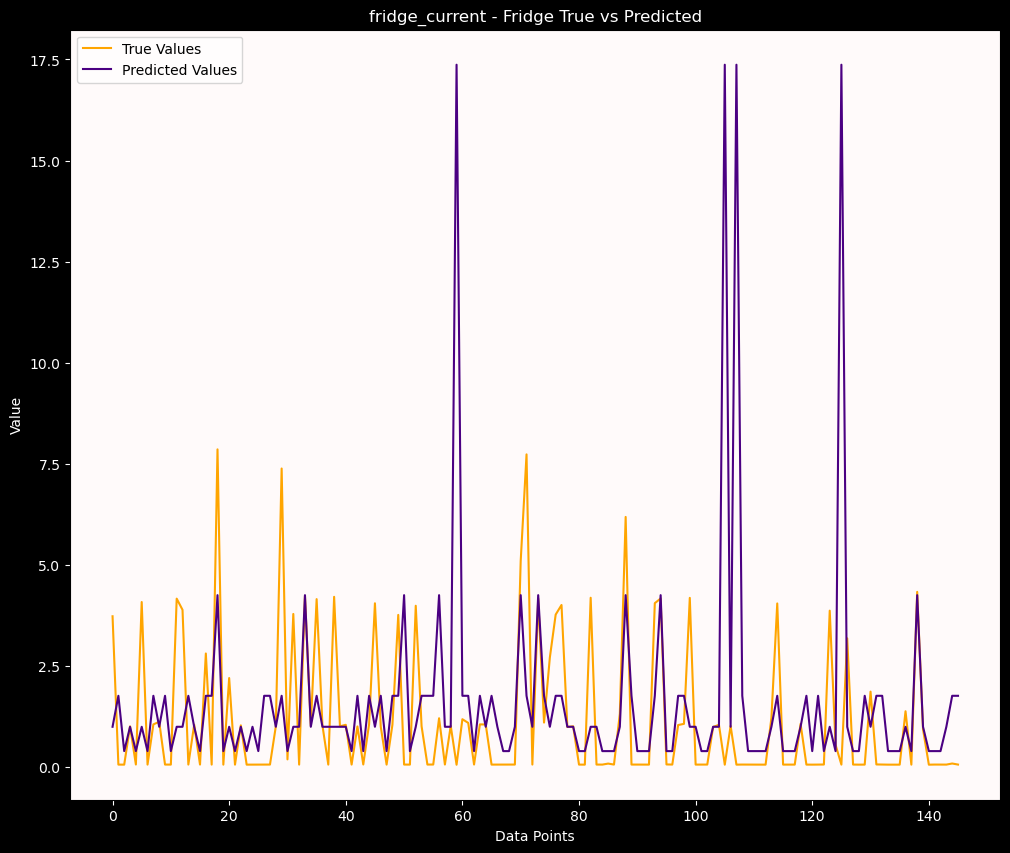

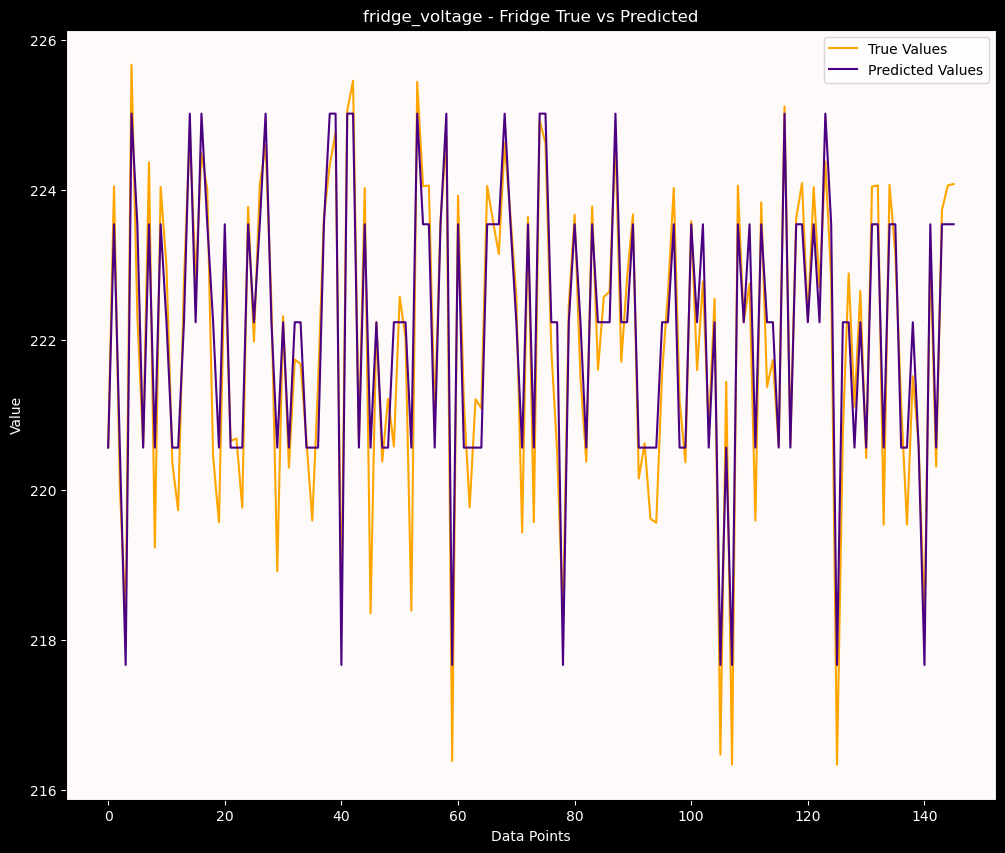

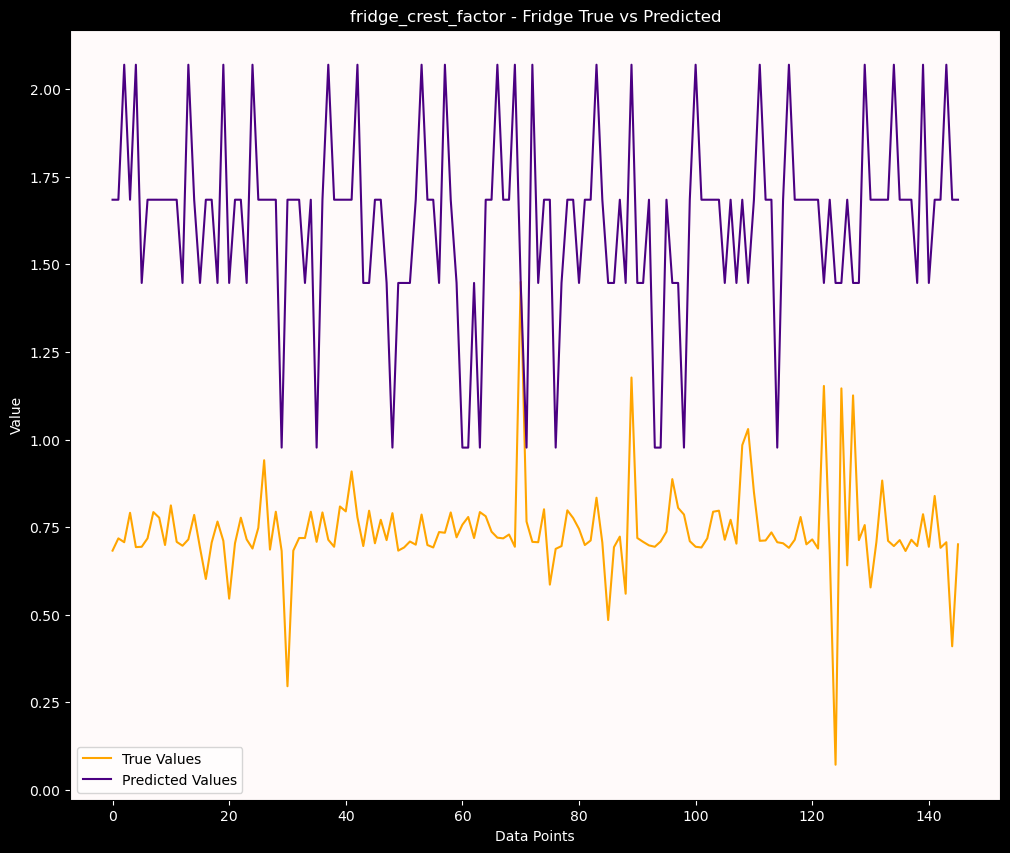

In [29]:
import matplotlib.pyplot as plt

# Plotting the predicted values against the true values for each column
for i in range(Y_test_fridge.shape[1]):
    column_name = fridge_features[i]
    column_true = Y_test_fridge[:, i]
    column_pred = disaggregated_data_fridge[:, i]
    
    fig, ax = plt.subplots(figsize=(12, 10))
    fig.patch.set_facecolor('black')
    
    ax.plot(column_true, label="True Values", color='orange')
    ax.plot(column_pred, label="Predicted Values", color='indigo')
    ax.set_xlabel("Data Points", color='white')
    ax.set_ylabel("Value", color='white')
    ax.set_title(column_name + " - Fridge True vs Predicted", color='white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.legend()
    
    # Change the color of the plot background
    ax.set_facecolor('snow')
    
    plt.show()


/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

Metrics for washing_machine_active_power:
RMSE: 398.42866440082366
MSE: 158745.4006162242
RMAE: 0.8307298037360773
MAE: 339.6623142682372
R2: 0.7373054820160698

Metrics for washing_machine_apparent_power:
RMSE: 408.4937688393571
MSE: 166867.1591805821
RMAE: 0.8330860113256809
MAE: 351.056759941489
R2: 0.7224549629407044

Metrics for washing_machine_current:
RMSE: 1.816303320355806
MSE: 3.2989577515355264
RMAE: 0.8148486768549839
MAE: 1.55739152394141
R2: 0.7360361085671171

Metrics for washing_machine_voltage:
RMSE: 1.1745871902637306
MSE: 1.3796550675316455
RMAE: 0.0052654471512426256
MAE: 0.8245674453686287
R2: 0.8918291158864414

Metrics for washing_machine_crest_factor:
RMSE: 1.4755970963343328
MSE: 2.177386790710314
RMAE: 1.7322439742584281
MAE: 1.2754930996569425
R2: -44.68805843968003

Metrics for pwrA:
RMSE: 398.42866440082366
MAE: 339.6623142682372
RMAE: 0.8307298037360773
MSE: 158745.4006162242
R-squared: 0.7373054820160698

Metrics for apwrA:
RMSE: 408.4937688393571
MAE: 35

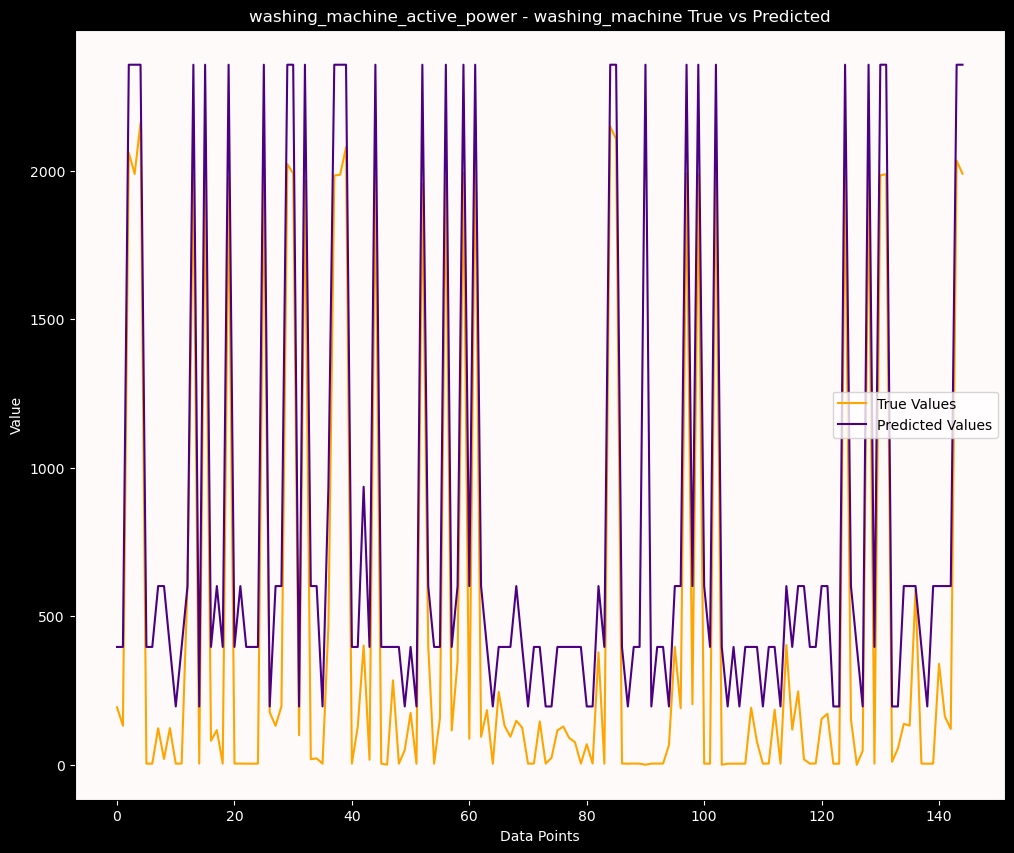

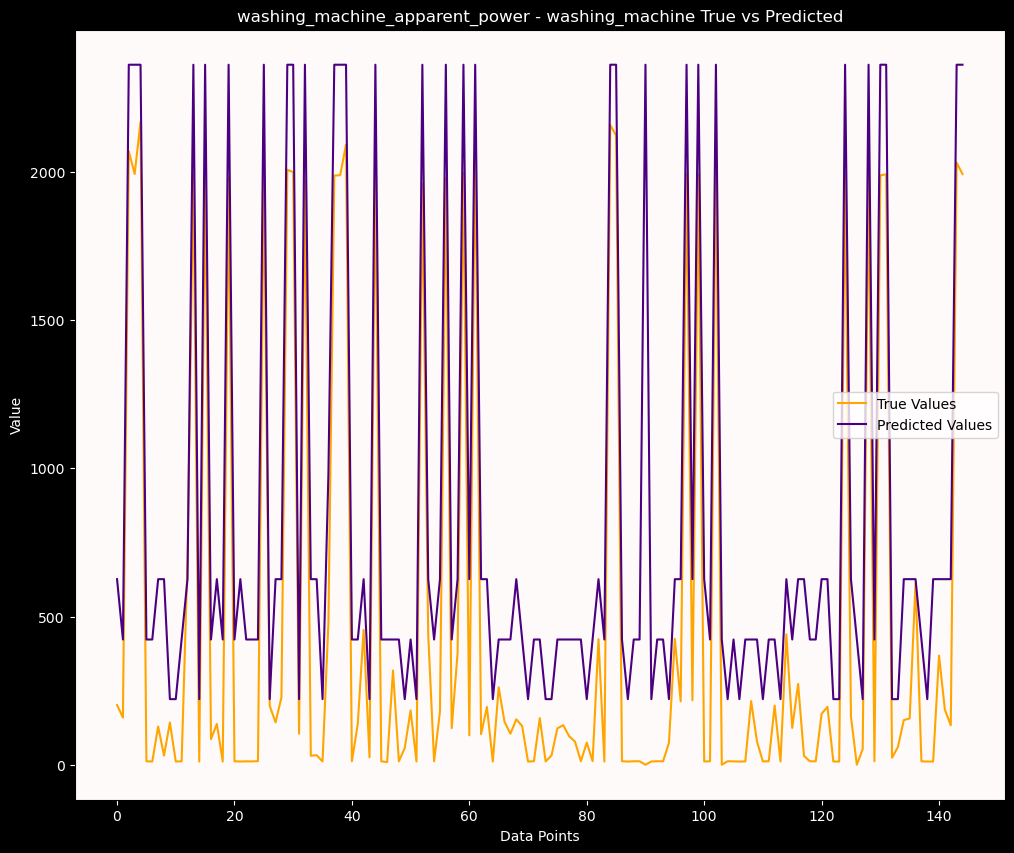

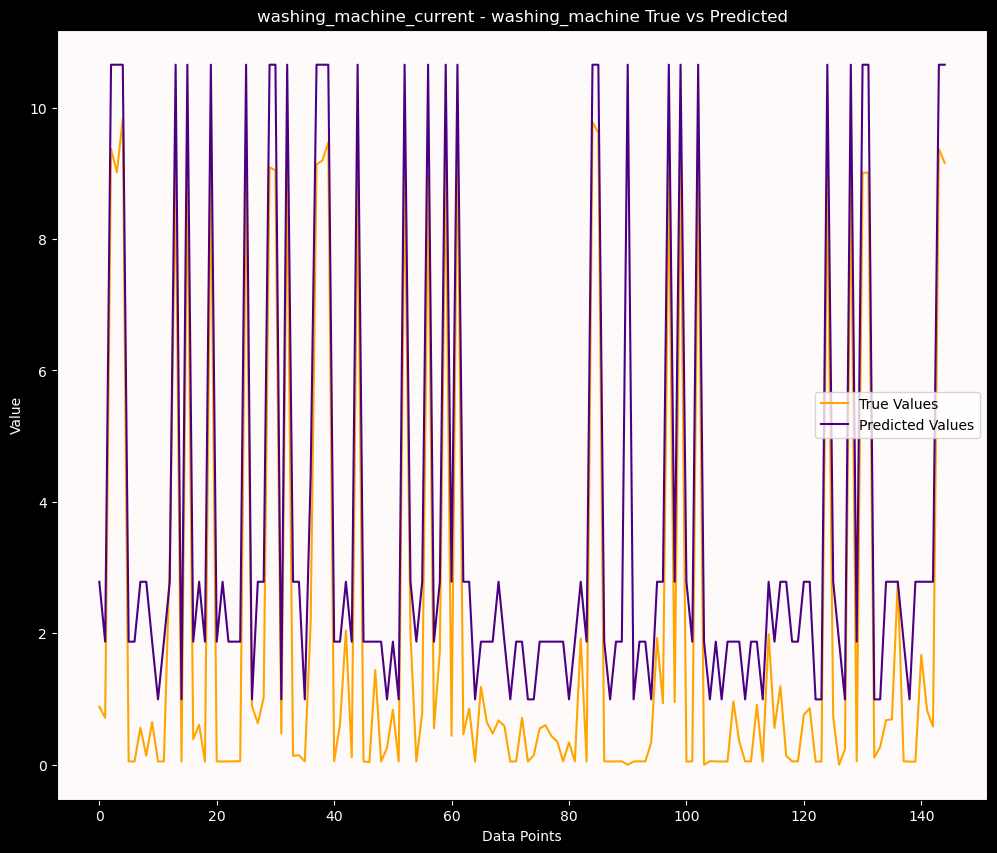

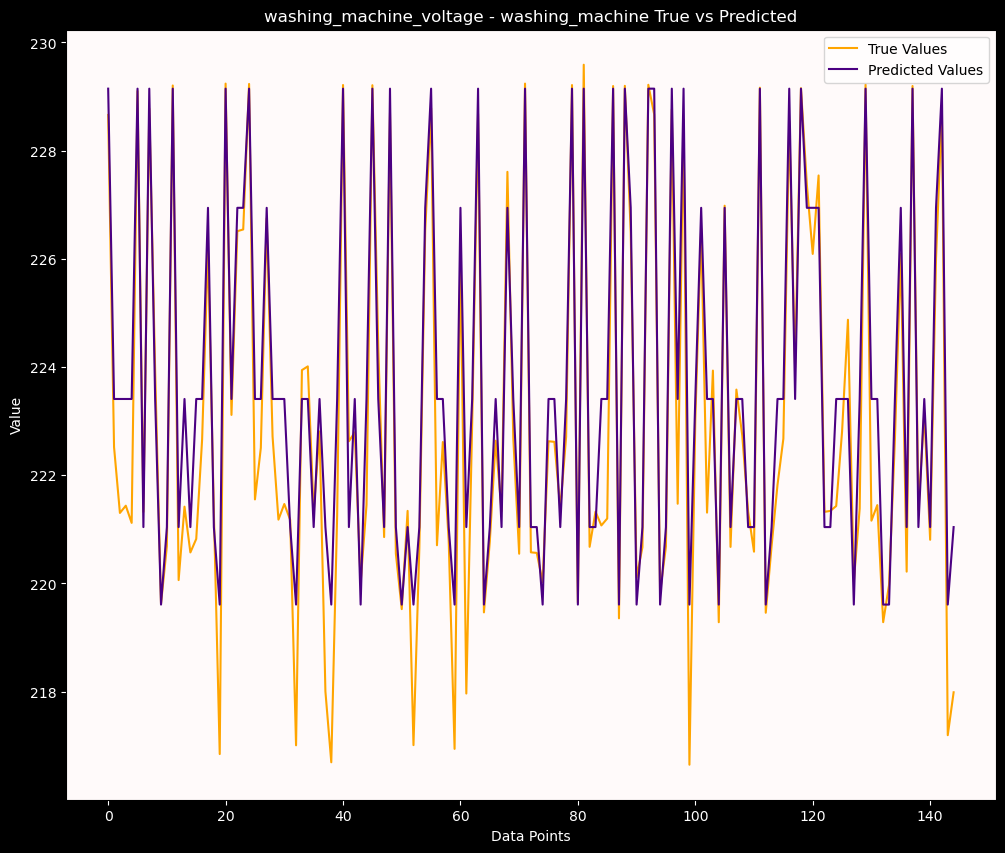

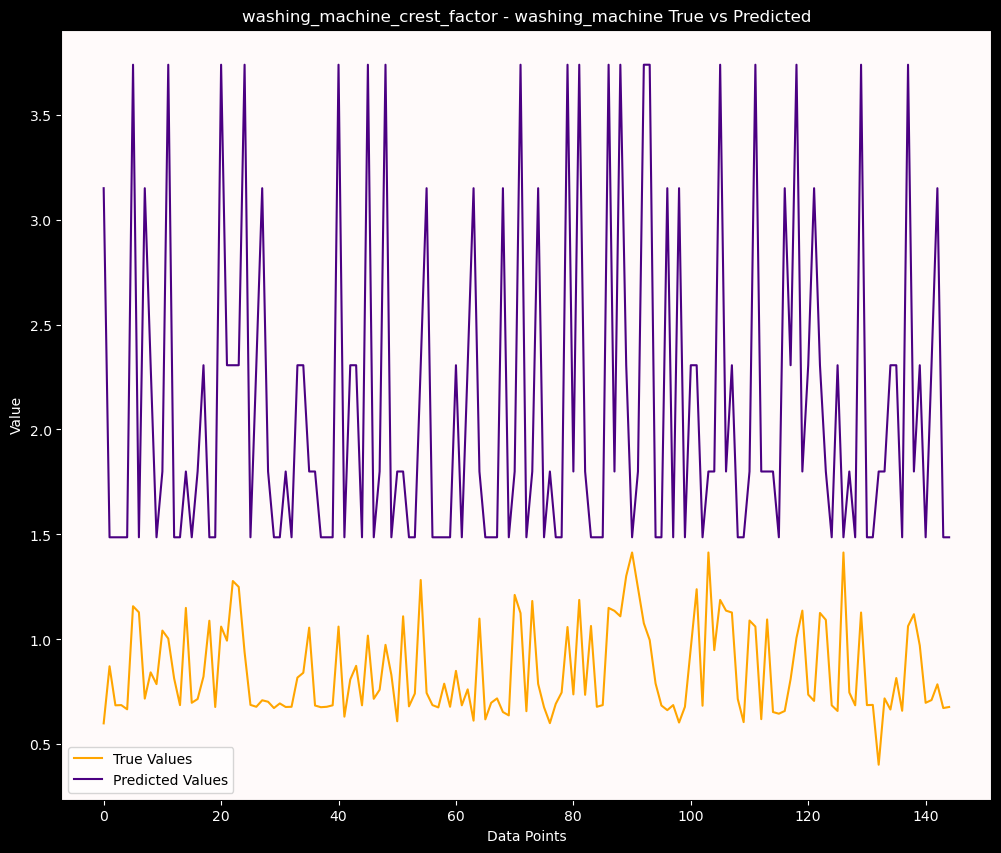

In [31]:
## WASHING MACHINE ##

X_washing_machine = washing_machine_data[aggregated_features].values
Y_washing_machine = washing_machine_data[washing_machine_features].values

X_train_washing_machine, X_test_washing_machine, Y_train_washing_machine, Y_test_washing_machine = train_test_split(X_washing_machine, Y_washing_machine, test_size=0.2, random_state=42)

co_disaggregator_washing_machine = CO(num_states=5, num_cluster=5)
co_disaggregator_washing_machine.train(X_train_washing_machine)

disaggregated_data_washing_machine = co_disaggregator_washing_machine.disaggregate(X_test_washing_machine)


for i, feature in enumerate(washing_machine_features):
    true_values = Y_test_washing_machine[:, i]
    pred_values = disaggregated_data_washing_machine[:, i]
    
    rmse = co_disaggregator_washing_machine.calculate_rmse(true_values, pred_values)
    mse = co_disaggregator_washing_machine.calculate_mse(true_values, pred_values)
    rmae = co_disaggregator_washing_machine.calculate_rmae(true_values, pred_values)
    mae = co_disaggregator_washing_machine.calculate_mae(true_values, pred_values)
    r2 = r2_score(true_values, pred_values)
    
    print(f"Metrics for {feature}:")
    print("RMSE:", rmse)
    print("MSE:", mse)
    print("RMAE:", rmae)
    print("MAE:", mae)
    print("R2:", r2)
    print()

# Print the metrics for each column
for column, metrics_dict in metrics.items():
    print(f"Metrics for {column}:")
    for metric, value in metrics_dict.items():
        print(f"{metric}: {value}")
    print()
 



# Plotting the predicted values against the true values for each column
import matplotlib.pyplot as plt

for i in range(Y_test_washing_machine.shape[1]):
    column_name = washing_machine_features[i]
    column_true = Y_test_washing_machine[:, i]
    column_pred = disaggregated_data_washing_machine[:, i]
    
    fig, ax = plt.subplots(figsize=(12, 10))
    fig.patch.set_facecolor('black')
    
    ax.plot(column_true, label="True Values", color='orange')
    ax.plot(column_pred, label="Predicted Values", color='indigo')
    ax.set_xlabel("Data Points", color='white')
    ax.set_ylabel("Value", color='white')
    ax.set_title(column_name + " - washing_machine True vs Predicted", color='white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.legend()
    
    # Change the color of the plot background
    ax.set_facecolor('snow')
    
    plt.show()


Metrics for microwave_active_power:
RMSE: 876.2643933032689
MSE: 767839.2869711459
RMAE: 1.3992899899753874
MAE: 667.3305449876453
R2: -0.650995597896848

Metrics for microwave_apparent_power:
RMSE: 776.7298742469658
MSE: 603309.2975477072
RMAE: 1.0109837509261814
MAE: 594.9691300810892
R2: -0.4914868167917734

Metrics for microwave_current:
RMSE: 3.509855728988523
MSE: 12.319087238313555
RMAE: 1.0035890578423392
MAE: 2.672002791441652
R2: -0.43998632727527043

Metrics for microwave_voltage:
RMSE: 1.149047966630423
MSE: 1.3203112296175097
RMAE: 0.005185271251925809
MAE: 0.9161293083982048
R2: 0.8522115848097086

Metrics for microwave_crest_factor:
RMSE: 0.8881150796608381
MSE: 0.7887483947209768
RMAE: 1.1514466680196414
MAE: 0.8452706382501483
R2: -14.134712281380612

Metrics for pwrA:
RMSE: 398.42866440082366
MAE: 339.6623142682372
RMAE: 0.8307298037360773
MSE: 158745.4006162242
R-squared: 0.7373054820160698

Metrics for apwrA:
RMSE: 408.4937688393571
MAE: 351.056759941489
RMAE: 0.833

/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

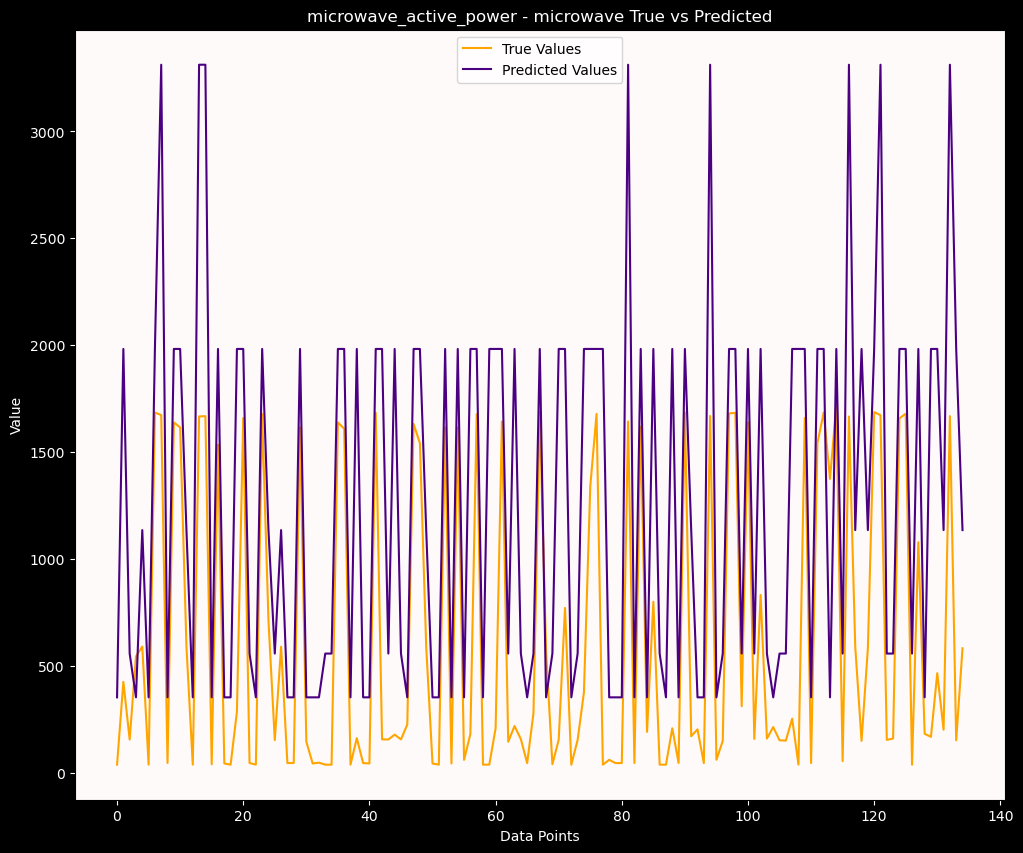

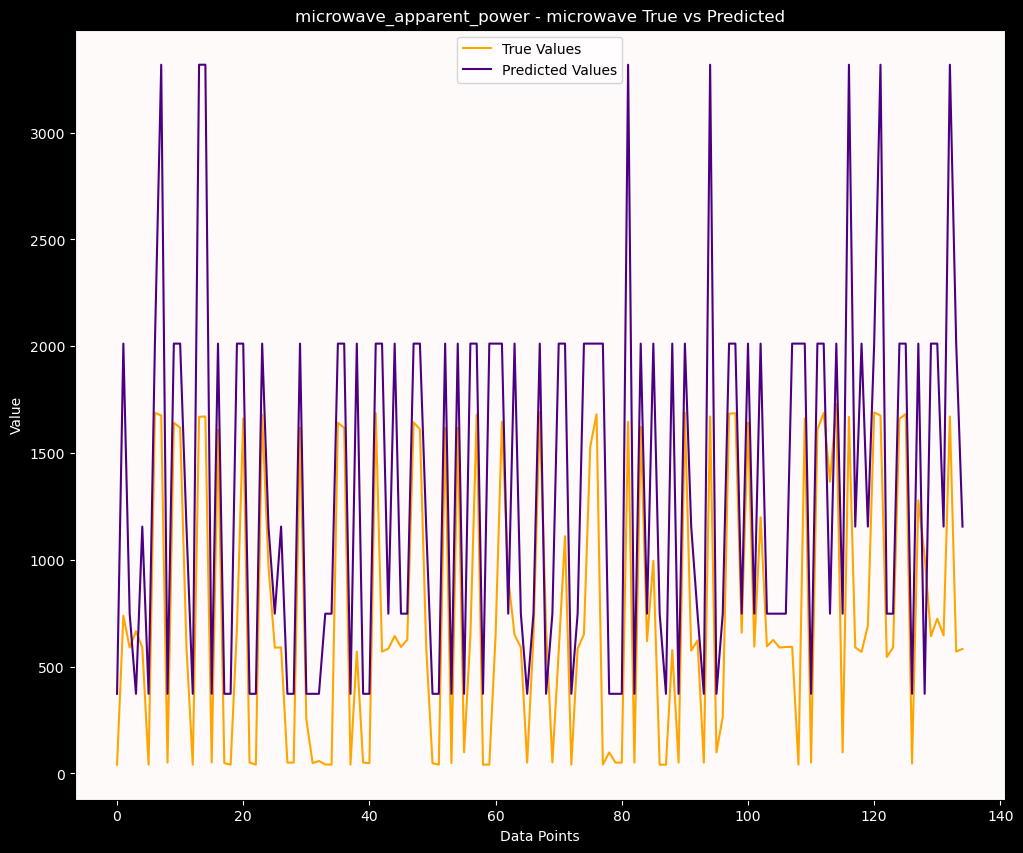

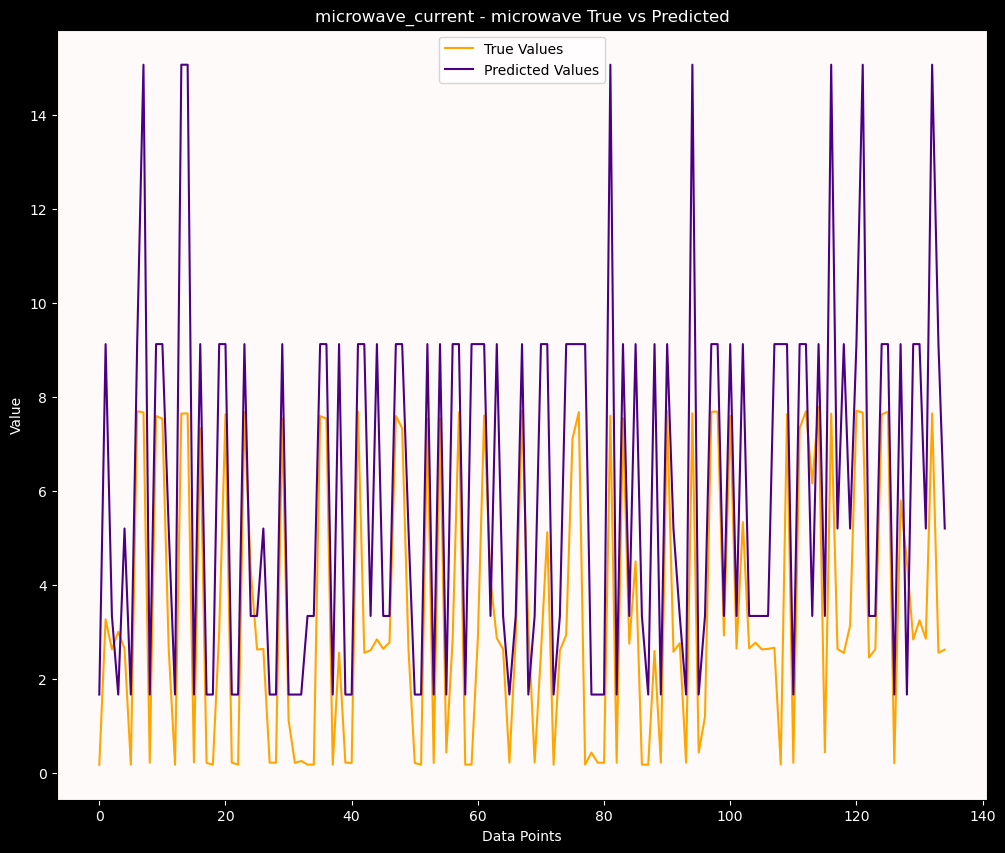

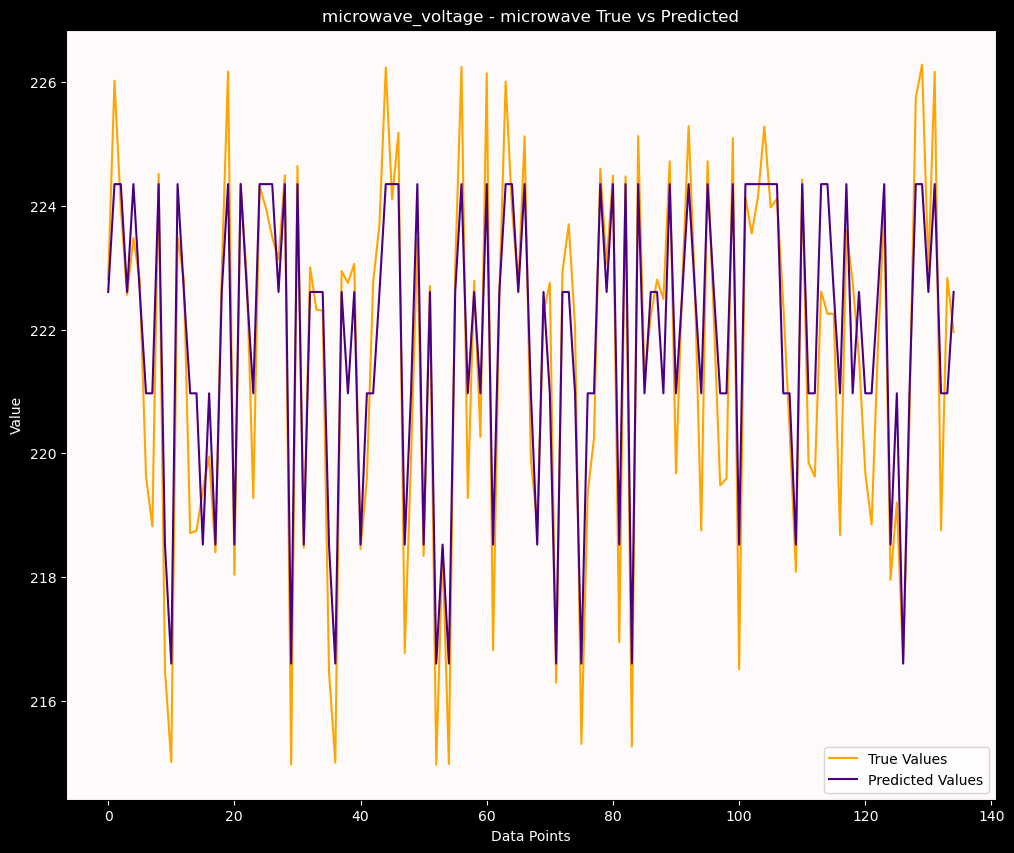

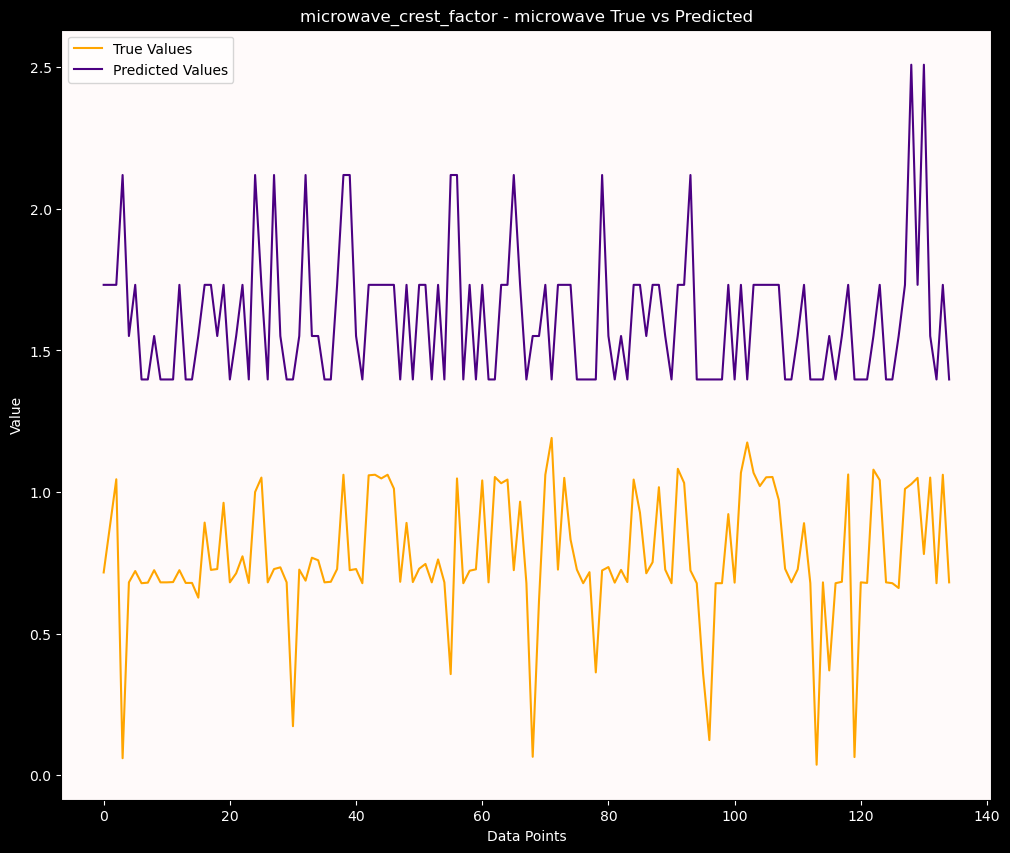

In [32]:
## MICROWAVE ##



X_microwave = microwave_data[aggregated_features].values
Y_microwave = microwave_data[microwave_features].values

X_train_microwave, X_test_microwave, Y_train_microwave, Y_test_microwave = train_test_split(X_microwave, Y_microwave, test_size=0.2, random_state=42)

co_disaggregator_microwave = CO(num_states=5, num_cluster=5)
co_disaggregator_microwave.train(X_train_microwave)

disaggregated_data_microwave = co_disaggregator_microwave.disaggregate(X_test_microwave)


for i, feature in enumerate(microwave_features):
    true_values = Y_test_microwave[:, i]
    pred_values = disaggregated_data_microwave[:, i]
    
    rmse = co_disaggregator_microwave.calculate_rmse(true_values, pred_values)
    mse = co_disaggregator_microwave.calculate_mse(true_values, pred_values)
    rmae = co_disaggregator_microwave.calculate_rmae(true_values, pred_values)
    mae = co_disaggregator_microwave.calculate_mae(true_values, pred_values)
    r2 = r2_score(true_values, pred_values)
    
    print(f"Metrics for {feature}:")
    print("RMSE:", rmse)
    print("MSE:", mse)
    print("RMAE:", rmae)
    print("MAE:", mae)
    print("R2:", r2)
    print()

# Print the metrics for each column
for column, metrics_dict in metrics.items():
    print(f"Metrics for {column}:")
    for metric, value in metrics_dict.items():
        print(f"{metric}: {value}")
    print()
 



# Plotting the predicted values against the true values for each column
import matplotlib.pyplot as plt
for i in range(Y_test_microwave.shape[1]):
    column_name = microwave_features[i]
    column_true = Y_test_microwave[:, i]
    column_pred = disaggregated_data_microwave[:, i]
    
    fig, ax = plt.subplots(figsize=(12, 10))
    fig.patch.set_facecolor('black')
    
    ax.plot(column_true, label="True Values", color='orange')
    ax.plot(column_pred, label="Predicted Values", color='indigo')
    ax.set_xlabel("Data Points", color='white')
    ax.set_ylabel("Value", color='white')
    ax.set_title(column_name + " - microwave True vs Predicted", color='white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.legend()
    
    # Change the color of the plot background
    ax.set_facecolor('snow')
    
    plt.show()


Metrics for dishwasher_active_power:
RMSE: 831.6753735720225
MSE: 691683.9270061633
RMAE: 83.81008131394248
MAE: 758.1422333333334
R2: -3516.375606468692

Metrics for dishwasher_apparent_power:
RMSE: 1052.9867109281927
MSE: 1108781.0133913734
RMAE: 35.39371815516266
MAE: 984.1307333333334
R2: -1006.5487861490565

Metrics for dishwasher_current:
RMSE: 4.793010512541501
MSE: 22.972949773333337
RMAE: 35.41633383651355
MAE: 4.4779333333333335
R2: -996.0225195058205

Metrics for dishwasher_voltage:
RMSE: 1.513437933976804
MSE: 2.290494379999977
RMAE: 0.006789924391686375
MAE: 1.0932666666666648
R2: 0.7091275733231883

Metrics for dishwasher_crest_factor:
RMSE: 0.9239894079078645
MSE: 0.8537564259259262
RMAE: 0.5138031925344938
MAE: 0.8184444444444446
R2: -0.2834205170245103

Metrics for pwrA:
RMSE: 398.42866440082366
MAE: 339.6623142682372
RMAE: 0.8307298037360773
MSE: 158745.4006162242
R-squared: 0.7373054820160698

Metrics for apwrA:
RMSE: 408.4937688393571
MAE: 351.056759941489
RMAE: 0.8

/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

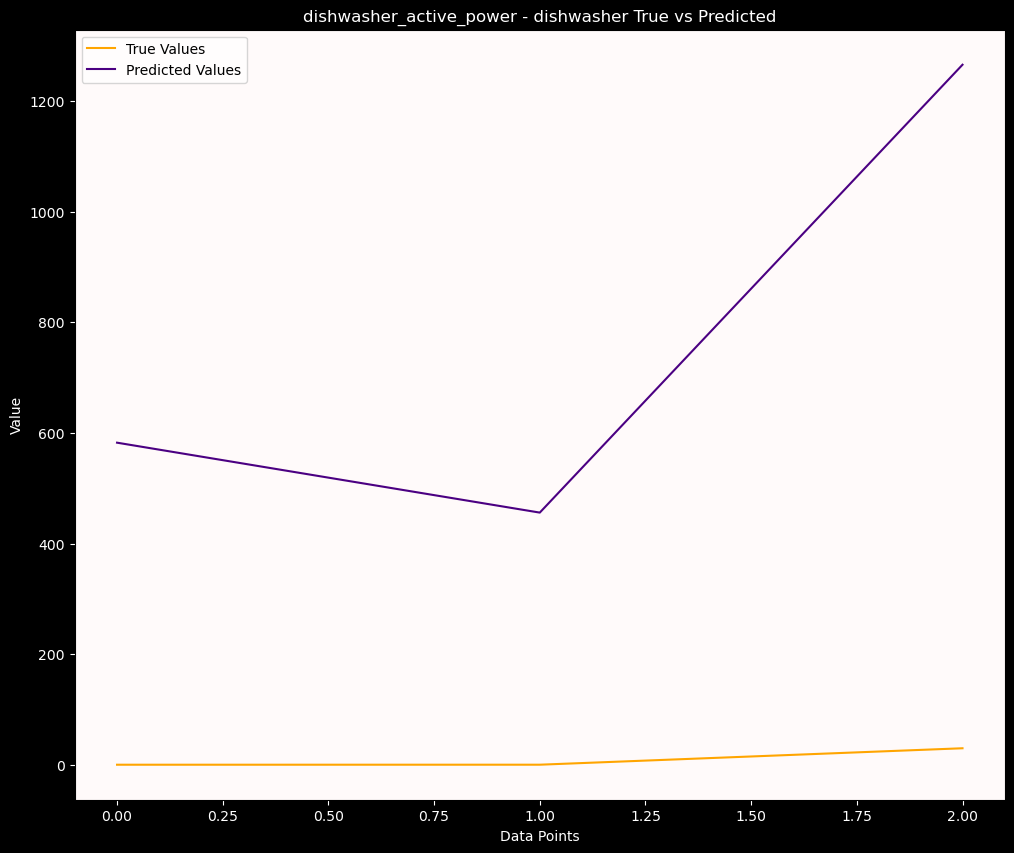

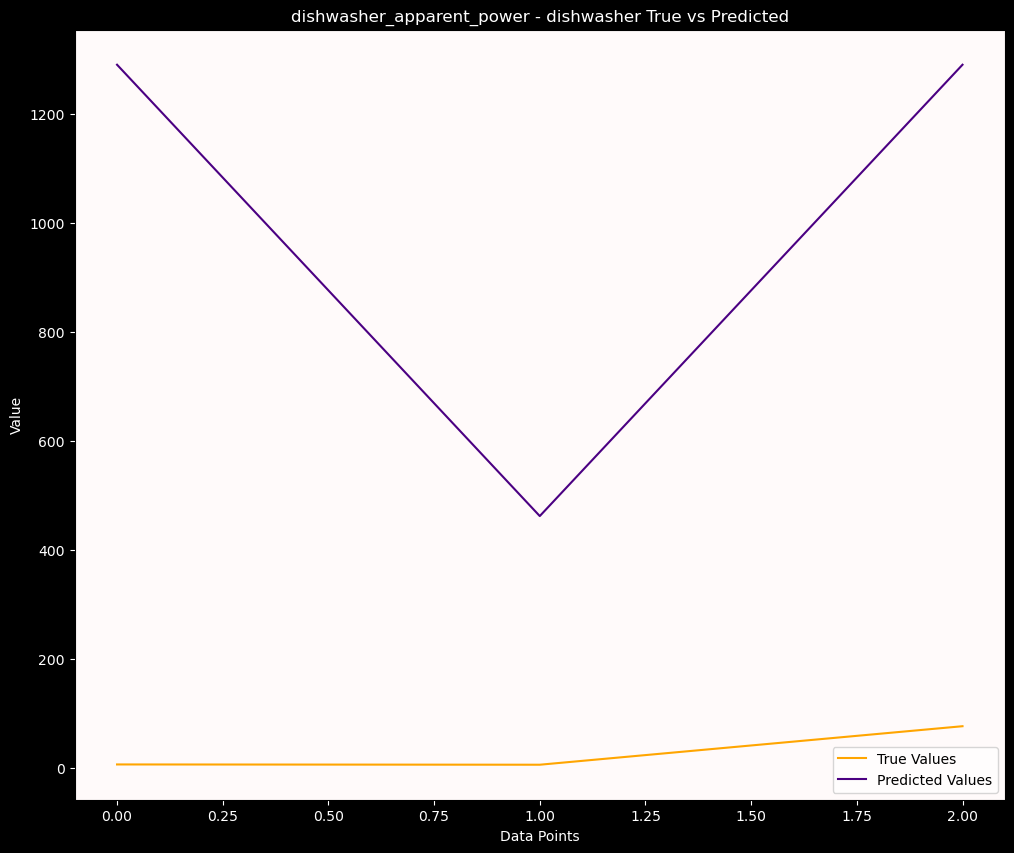

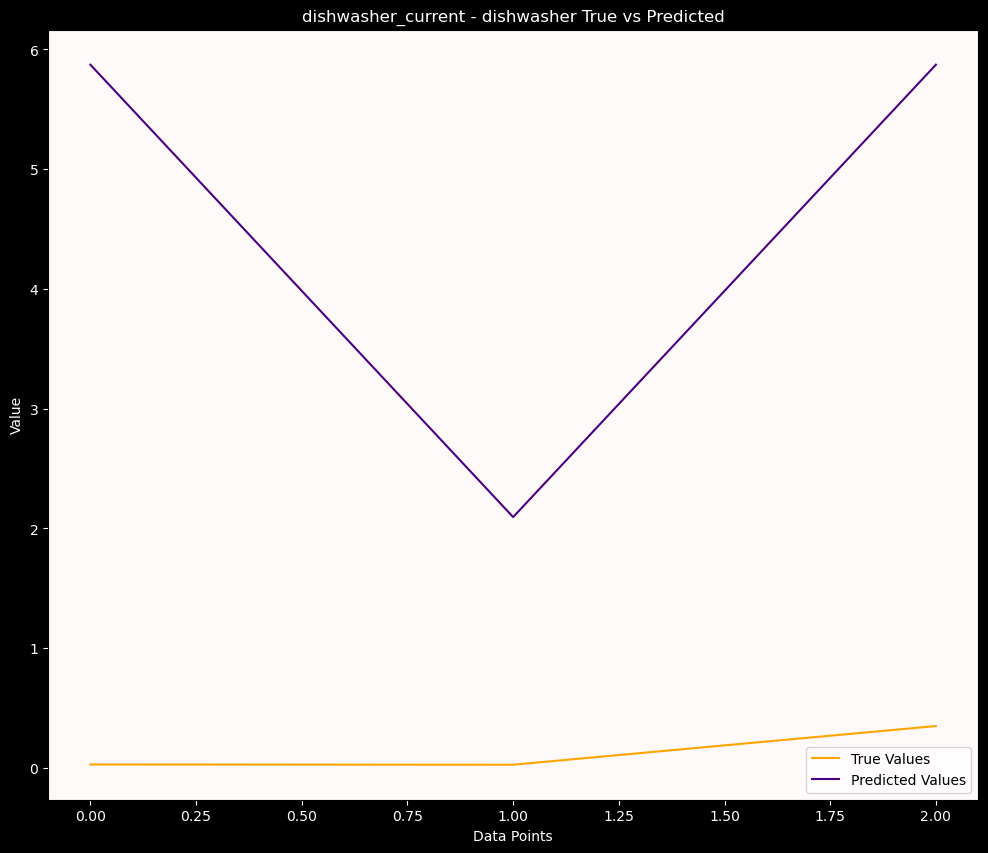

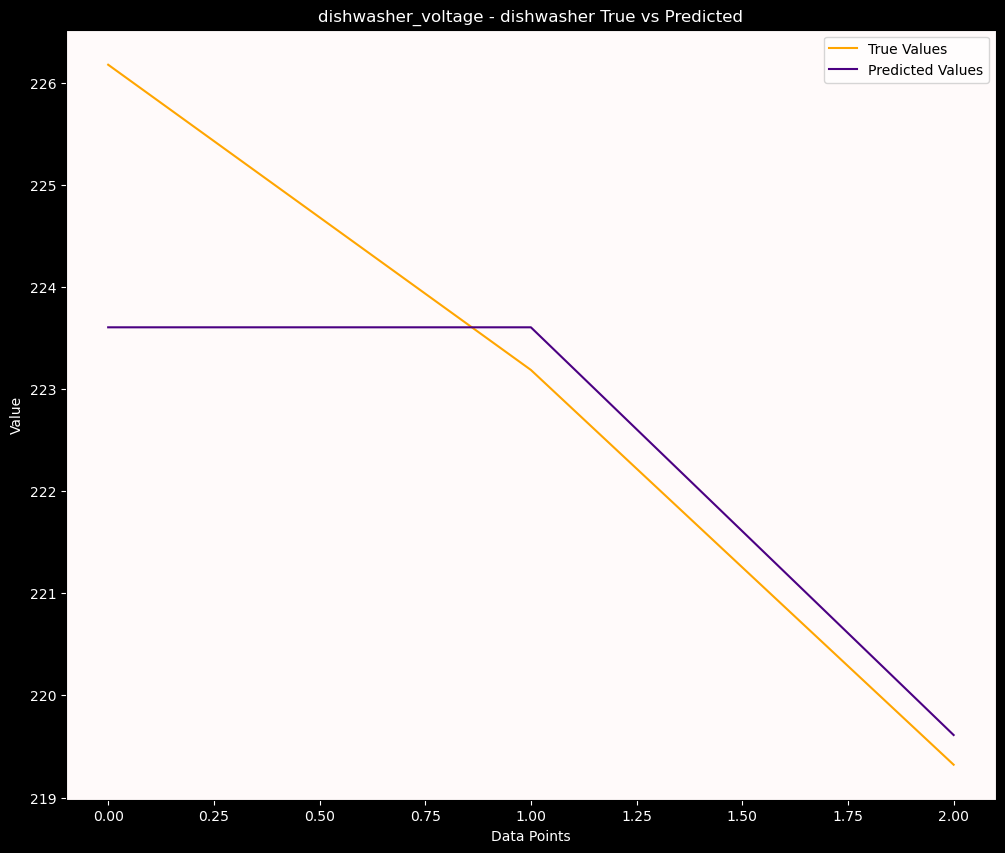

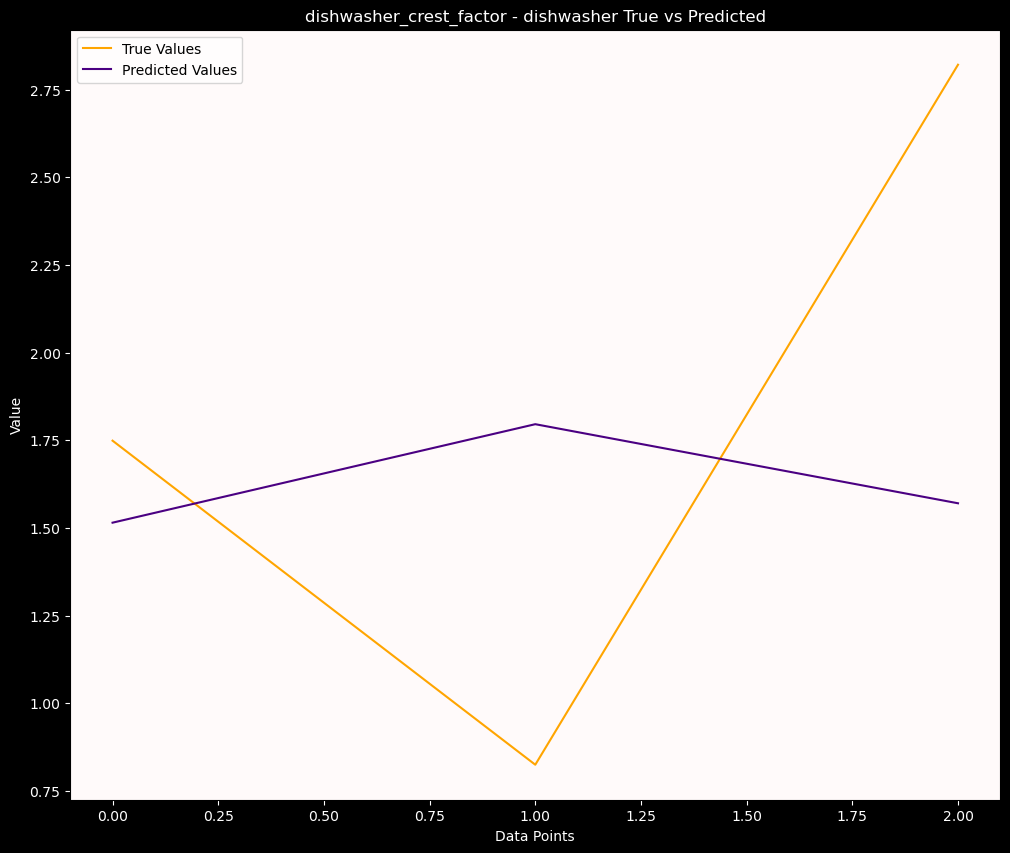

In [33]:
## dishwasher ##



X_dishwasher = dishwasher_data[aggregated_features].values
Y_dishwasher = dishwasher_data[dishwasher_features].values

X_train_dishwasher, X_test_dishwasher, Y_train_dishwasher, Y_test_dishwasher = train_test_split(X_dishwasher, Y_dishwasher, test_size=0.2, random_state=42)

co_disaggregator_dishwasher = CO(num_states=5, num_cluster=5)
co_disaggregator_dishwasher.train(X_train_dishwasher)

disaggregated_data_dishwasher = co_disaggregator_dishwasher.disaggregate(X_test_dishwasher)


for i, feature in enumerate(dishwasher_features):
    true_values = Y_test_dishwasher[:, i]
    pred_values = disaggregated_data_dishwasher[:, i]
    
    rmse = co_disaggregator_dishwasher.calculate_rmse(true_values, pred_values)
    mse = co_disaggregator_dishwasher.calculate_mse(true_values, pred_values)
    rmae = co_disaggregator_dishwasher.calculate_rmae(true_values, pred_values)
    mae = co_disaggregator_dishwasher.calculate_mae(true_values, pred_values)
    r2 = r2_score(true_values, pred_values)
    
    print(f"Metrics for {feature}:")
    print("RMSE:", rmse)
    print("MSE:", mse)
    print("RMAE:", rmae)
    print("MAE:", mae)
    print("R2:", r2)
    print()

# Print the metrics for each column
for column, metrics_dict in metrics.items():
    print(f"Metrics for {column}:")
    for metric, value in metrics_dict.items():
        print(f"{metric}: {value}")
    print()
 



# Plotting the predicted values against the true values for each column
import matplotlib.pyplot as plt
for i in range(Y_test_dishwasher.shape[1]):
    column_name = dishwasher_features[i]
    column_true = Y_test_dishwasher[:, i]
    column_pred = disaggregated_data_dishwasher[:, i]
    
    fig, ax = plt.subplots(figsize=(12, 10))
    fig.patch.set_facecolor('black')
    
    ax.plot(column_true, label="True Values", color='orange')
    ax.plot(column_pred, label="Predicted Values", color='indigo')
    ax.set_xlabel("Data Points", color='white')
    ax.set_ylabel("Value", color='white')
    ax.set_title(column_name + " - dishwasher True vs Predicted", color='white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.legend()
    
    # Change the color of the plot background
    ax.set_facecolor('snow')
    
    plt.show()


Metrics for hotplate_active_power:
RMSE: 435.2923372581698
MSE: 189479.41887568025
RMAE: 9.487192985024002
MAE: 368.63172962406014
R2: -5.56436425347363

Metrics for hotplate_apparent_power:
RMSE: 475.88992929307517
MSE: 226471.2248025681
RMAE: 9.13943511167334
MAE: 409.80575067189255
R2: -6.504578475685767

Metrics for hotplate_current:
RMSE: 2.1270049133522497
MSE: 4.524149901424612
RMAE: 9.02803443697899
MAE: 1.8278261478163493
R2: -6.293820335594597

Metrics for hotplate_voltage:
RMSE: 0.2484790991900208
MSE: 0.061741862734284204
RMAE: 0.0011068579703373677
MAE: 0.1418861493533555
R2: 0.9793413524095552

Metrics for hotplate_crest_factor:
RMSE: 0.4500652187207925
MSE: 0.20255870110219482
RMAE: 0.3456191205043713
MAE: 0.3329561111111112
R2: 0.2585950377297064

Metrics for pwrA:
RMSE: 398.42866440082366
MAE: 339.6623142682372
RMAE: 0.8307298037360773
MSE: 158745.4006162242
R-squared: 0.7373054820160698

Metrics for apwrA:
RMSE: 408.4937688393571
MAE: 351.056759941489
RMAE: 0.83308601

/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

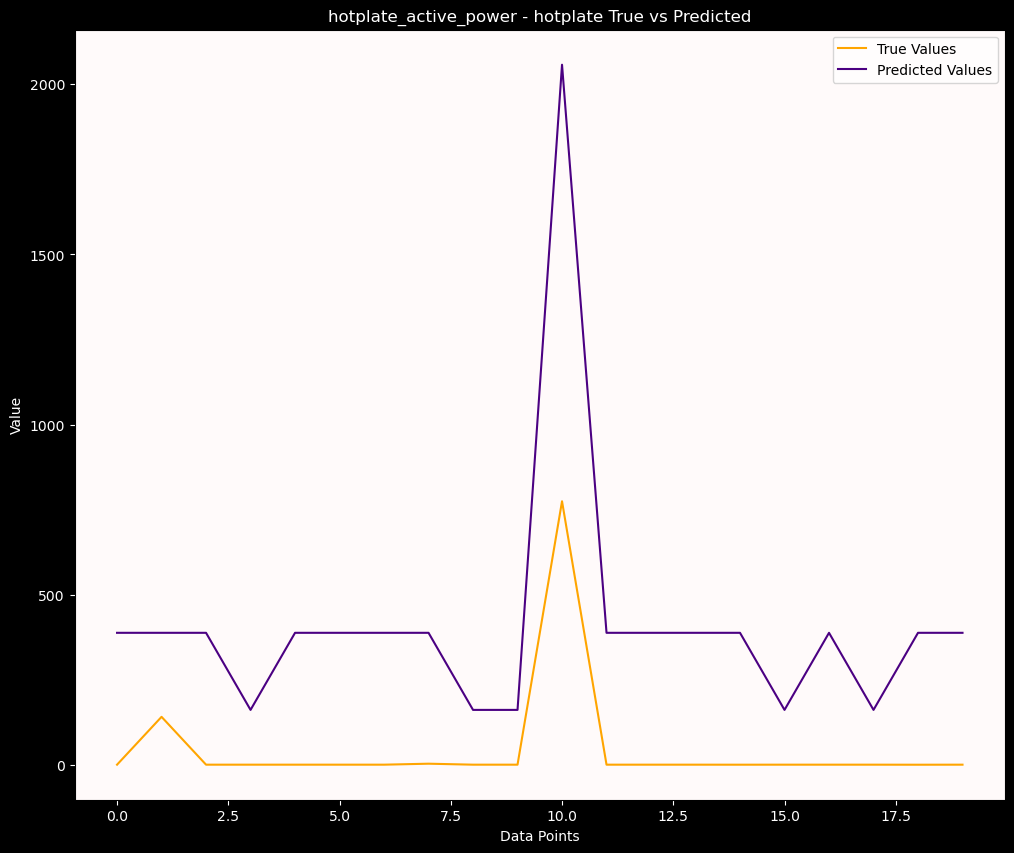

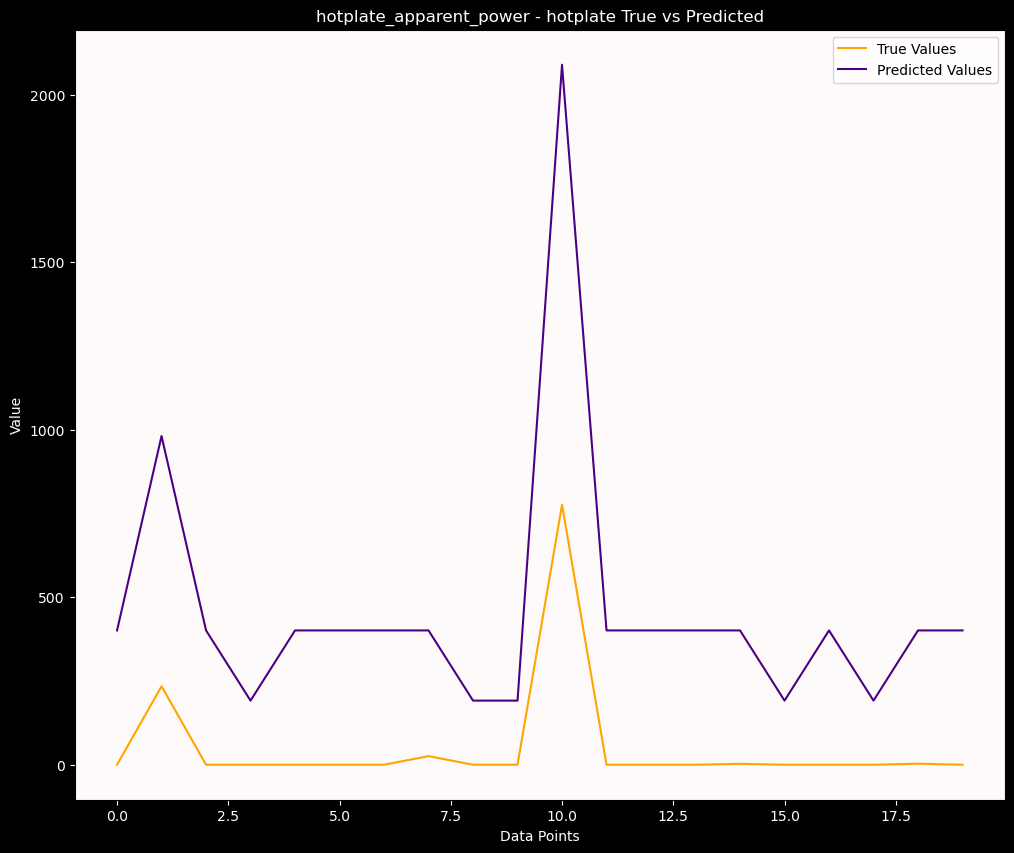

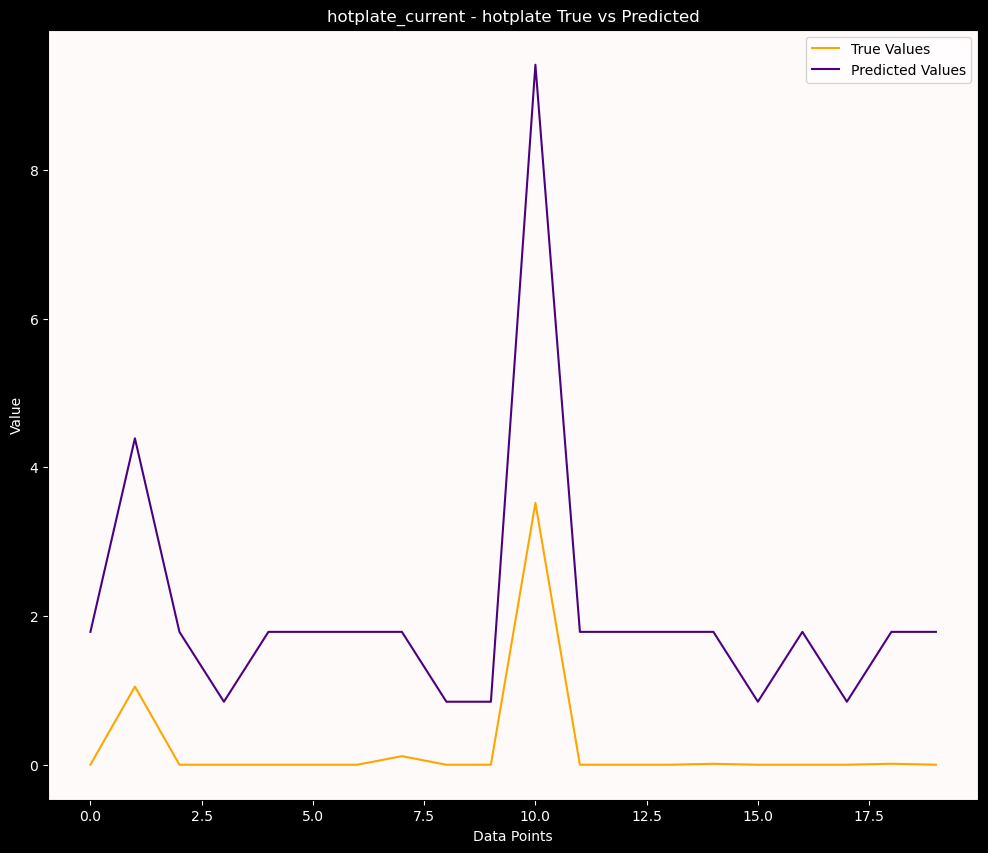

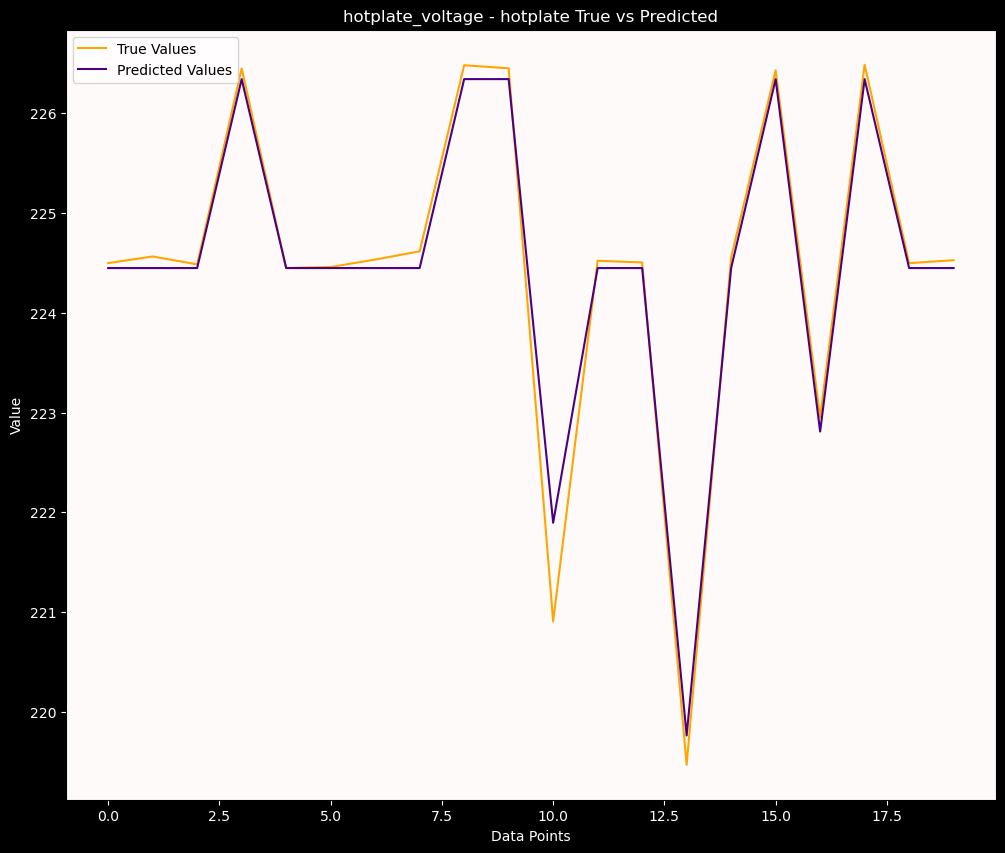

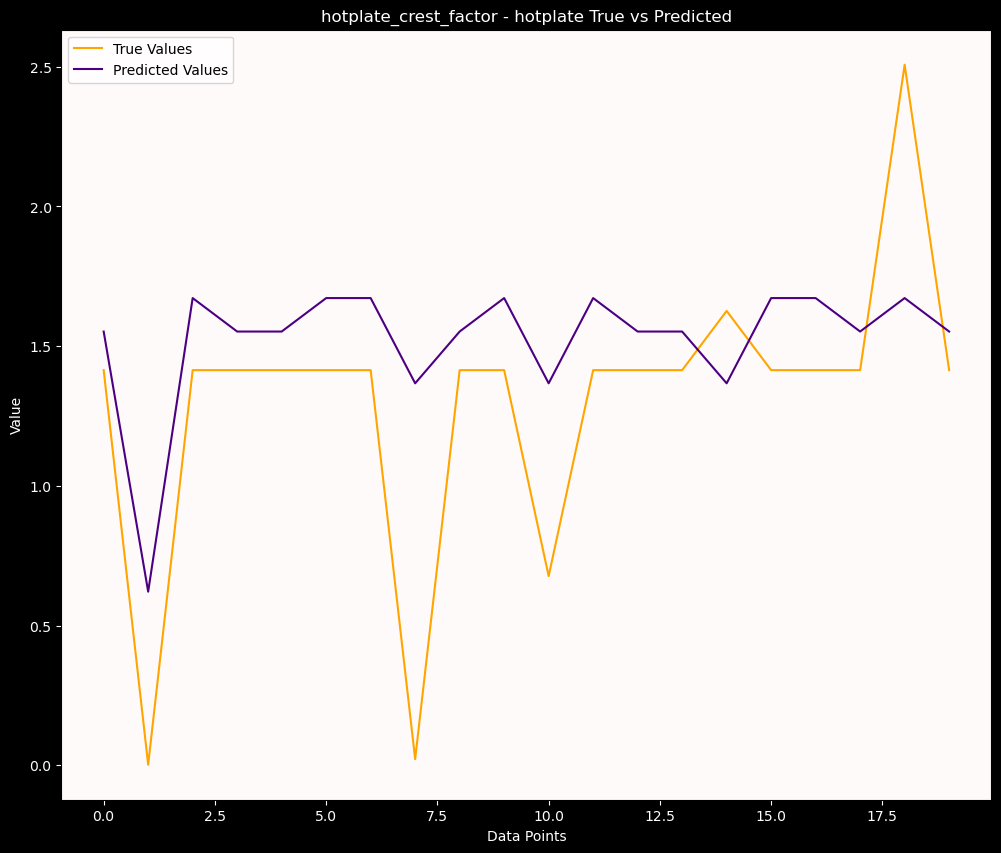

In [35]:
## hotplate ##



X_hotplate = hotplate_data[aggregated_features].values
Y_hotplate = hotplate_data[hotplate_features].values

X_train_hotplate, X_test_hotplate, Y_train_hotplate, Y_test_hotplate = train_test_split(X_hotplate, Y_hotplate, test_size=0.2, random_state=42)

co_disaggregator_hotplate = CO(num_states=5, num_cluster=5)
co_disaggregator_hotplate.train(X_train_hotplate)

disaggregated_data_hotplate = co_disaggregator_hotplate.disaggregate(X_test_hotplate)


for i, feature in enumerate(hotplate_features):
    true_values = Y_test_hotplate[:, i]
    pred_values = disaggregated_data_hotplate[:, i]
    
    rmse = co_disaggregator_hotplate.calculate_rmse(true_values, pred_values)
    mse = co_disaggregator_hotplate.calculate_mse(true_values, pred_values)
    rmae = co_disaggregator_hotplate.calculate_rmae(true_values, pred_values)
    mae = co_disaggregator_hotplate.calculate_mae(true_values, pred_values)
    r2 = r2_score(true_values, pred_values)
    
    print(f"Metrics for {feature}:")
    print("RMSE:", rmse)
    print("MSE:", mse)
    print("RMAE:", rmae)
    print("MAE:", mae)
    print("R2:", r2)
    print()

# Print the metrics for each column
for column, metrics_dict in metrics.items():
    print(f"Metrics for {column}:")
    for metric, value in metrics_dict.items():
        print(f"{metric}: {value}")
    print()
 



# Plotting the predicted values against the true values for each column
import matplotlib.pyplot as plt
for i in range(Y_test_hotplate.shape[1]):
    column_name = hotplate_features[i]
    column_true = Y_test_hotplate[:, i]
    column_pred = disaggregated_data_hotplate[:, i]
    
    fig, ax = plt.subplots(figsize=(12, 10))
    fig.patch.set_facecolor('black')
    
    ax.plot(column_true, label="True Values", color='orange')
    ax.plot(column_pred, label="Predicted Values", color='indigo')
    ax.set_xlabel("Data Points", color='white')
    ax.set_ylabel("Value", color='white')
    ax.set_title(column_name + " - hotplate True vs Predicted", color='white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.legend()
    
    # Change the color of the plot background
    ax.set_facecolor('snow')
    
    plt.show()


/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

Metrics for water_heater_active_power:
RMSE: 728.0711366165891
MSE: 530087.5799741719
RMAE: 9.004935698855098
MAE: 499.3342829806818
R2: -0.8838433230421692

Metrics for water_heater_apparent_power:
RMSE: 741.5715324134223
MSE: 549928.3376859914
RMAE: 8.294685601451178
MAE: 519.5991088266417
R2: -0.9570084782793009

Metrics for water_heater_current:
RMSE: 3.347116976604234
MSE: 11.203192055072268
RMAE: 8.225998427593124
MAE: 2.3367179049699085
R2: -0.9206434514298405

Metrics for water_heater_voltage:
RMSE: 0.6803499181319681
MSE: 0.46287601110217574
RMAE: 0.003056724082833566
MAE: 0.5592948963512582
R2: 0.9210952248271485

Metrics for water_heater_crest_factor:
RMSE: 0.9625240591191115
MSE: 0.926452564383131
RMAE: 0.40927071346900723
MAE: 0.7594992255313808
R2: -2.2772487781905517

Metrics for pwrA:
RMSE: 398.42866440082366
MAE: 339.6623142682372
RMAE: 0.8307298037360773
MSE: 158745.4006162242
R-squared: 0.7373054820160698

Metrics for apwrA:
RMSE: 408.4937688393571
MAE: 351.056759941

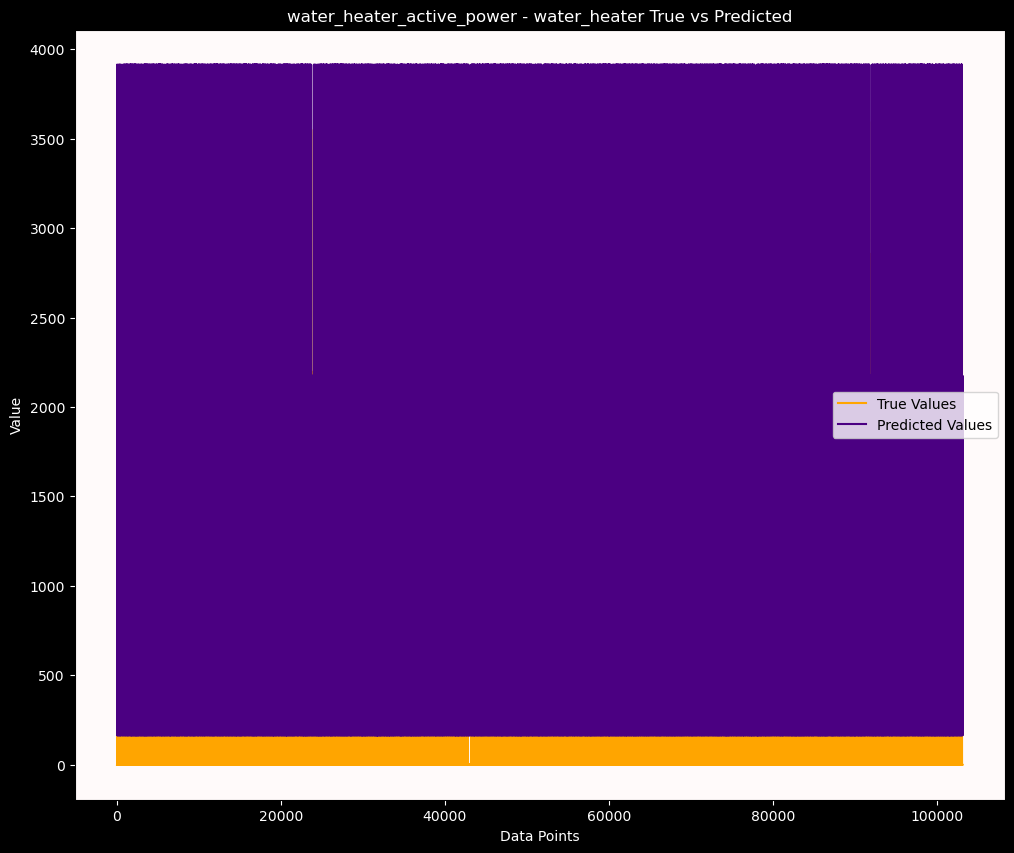

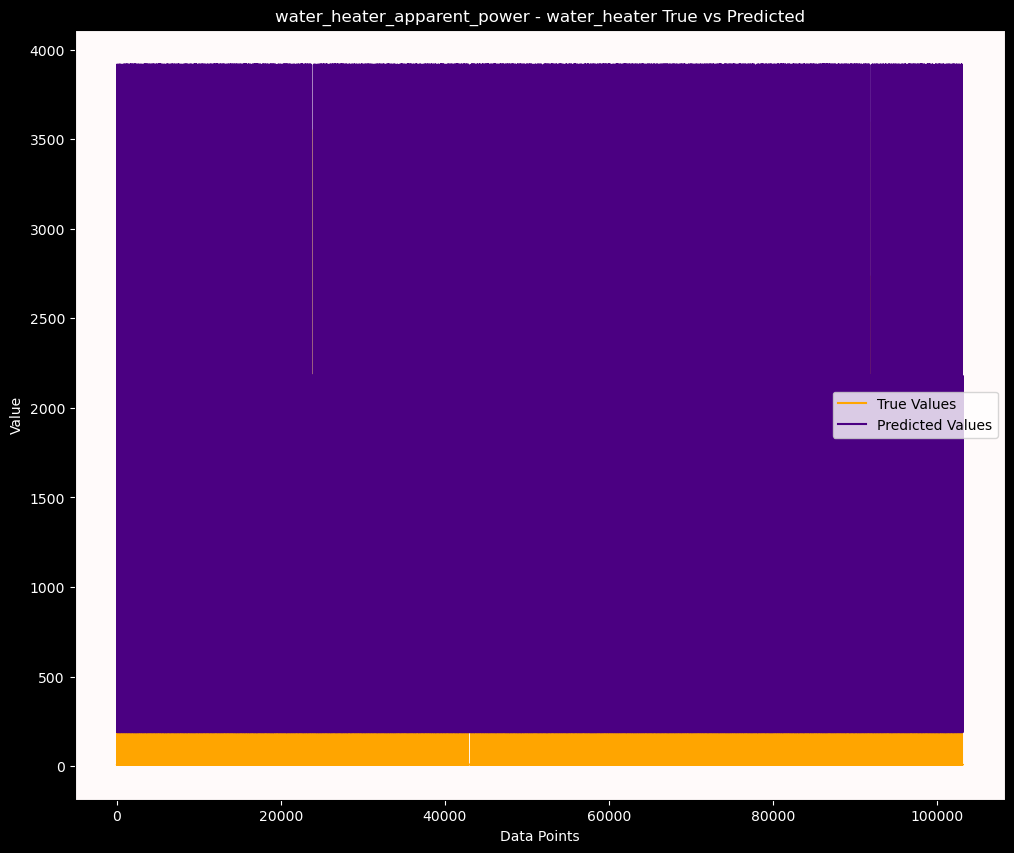

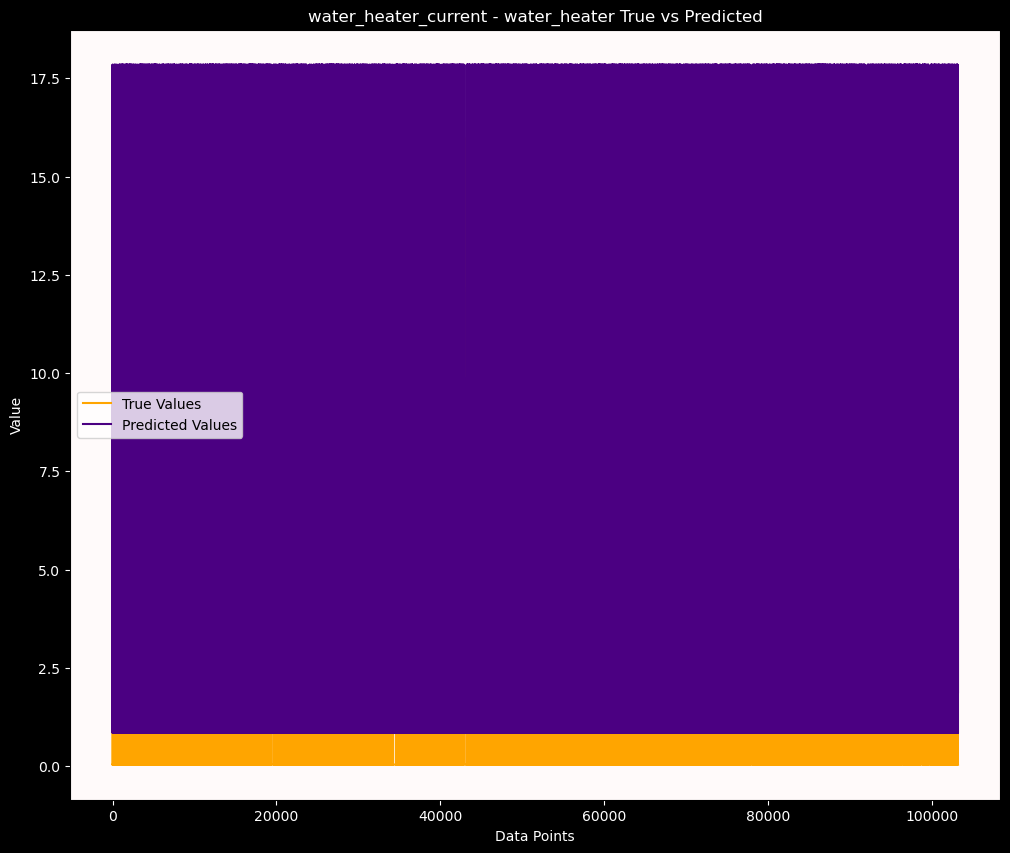

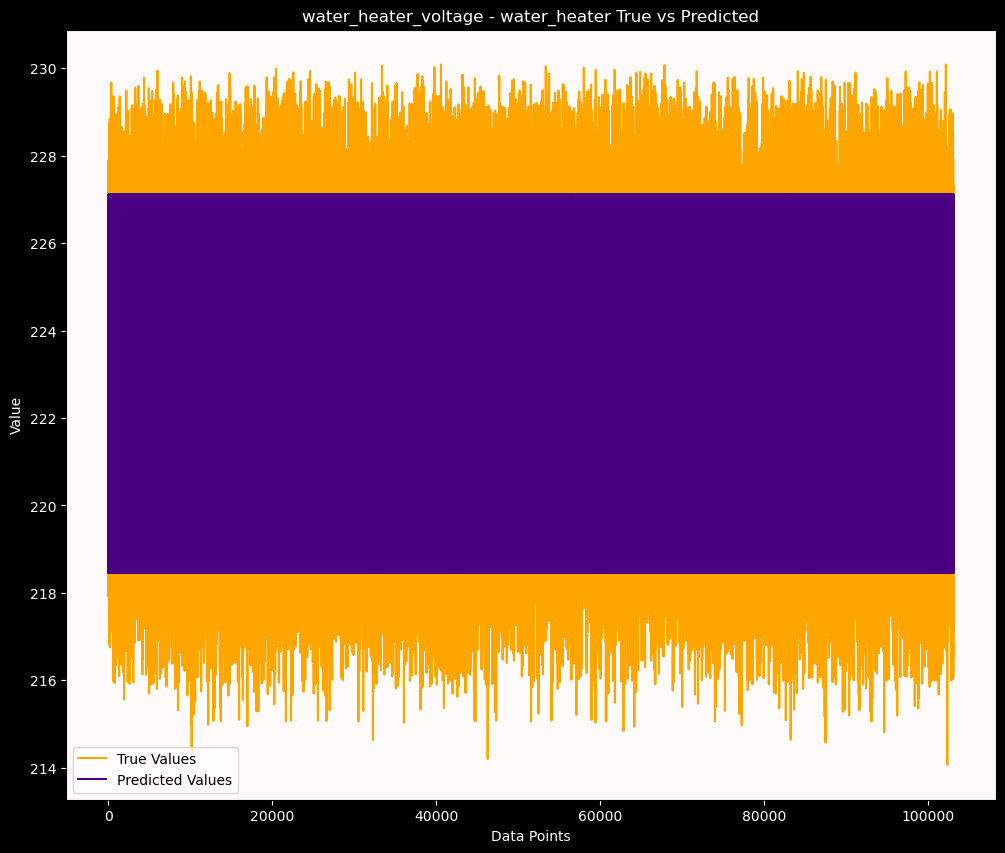

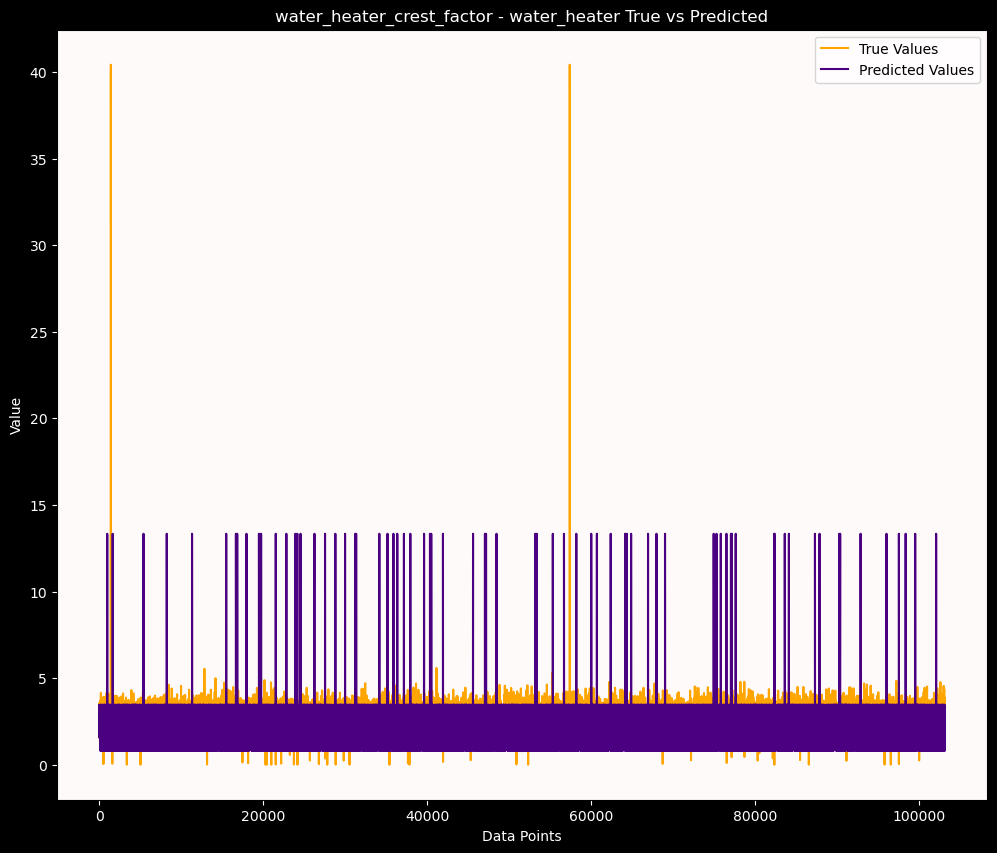

In [36]:
## water_heater ##



X_water_heater = water_heater_data[aggregated_features].values
Y_water_heater = water_heater_data[water_heater_features].values

X_train_water_heater, X_test_water_heater, Y_train_water_heater, Y_test_water_heater = train_test_split(X_water_heater, Y_water_heater, test_size=0.2, random_state=42)

co_disaggregator_water_heater = CO(num_states=5, num_cluster=5)
co_disaggregator_water_heater.train(X_train_water_heater)

disaggregated_data_water_heater = co_disaggregator_water_heater.disaggregate(X_test_water_heater)


for i, feature in enumerate(water_heater_features):
    true_values = Y_test_water_heater[:, i]
    pred_values = disaggregated_data_water_heater[:, i]
    
    rmse = co_disaggregator_water_heater.calculate_rmse(true_values, pred_values)
    mse = co_disaggregator_water_heater.calculate_mse(true_values, pred_values)
    rmae = co_disaggregator_water_heater.calculate_rmae(true_values, pred_values)
    mae = co_disaggregator_water_heater.calculate_mae(true_values, pred_values)
    r2 = r2_score(true_values, pred_values)
    
    print(f"Metrics for {feature}:")
    print("RMSE:", rmse)
    print("MSE:", mse)
    print("RMAE:", rmae)
    print("MAE:", mae)
    print("R2:", r2)
    print()

# Print the metrics for each column
for column, metrics_dict in metrics.items():
    print(f"Metrics for {column}:")
    for metric, value in metrics_dict.items():
        print(f"{metric}: {value}")
    print()
 



# Plotting the predicted values against the true values for each column
import matplotlib.pyplot as plt
for i in range(Y_test_water_heater.shape[1]):
    column_name = water_heater_features[i]
    column_true = Y_test_water_heater[:, i]
    column_pred = disaggregated_data_water_heater[:, i]
    
    fig, ax = plt.subplots(figsize=(12, 10))
    fig.patch.set_facecolor('black')
    
    ax.plot(column_true, label="True Values", color='orange')
    ax.plot(column_pred, label="Predicted Values", color='indigo')
    ax.set_xlabel("Data Points", color='white')
    ax.set_ylabel("Value", color='white')
    ax.set_title(column_name + " - water_heater True vs Predicted", color='white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.legend()
    
    # Change the color of the plot background
    ax.set_facecolor('snow')
    
    plt.show()
